In [1]:
%matplotlib inline

import matplotlib.pylab as plt
from scipy import integrate
import numpy  as np
from numpy import sqrt,cos,sin,arctan,pi,exp
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D
from JSAnimation import IPython_display
from ipywidgets import StaticInteract, RangeWidget,RadioWidget
from IPython.display import display, clear_output
from matplotlib import animation

 The Magnus force models the spin of the ball produced by the kicking action, for instance.  To better understand the spin, see the figure below from the paper.

 

To begin, define the initial position $x_0$ and velocity ($v_0$) vectors, the spin ($m$) vector, and the gravity ($g$) vector.

 	 
 
 

Parameters in this model include:

$A$ = cross-sectional area of the ball
$M$ = mass of the ball
$\rho$ = air density
$k = \rho A / (2 M)$
$C_d$ = constant of proportionality in the air resistance term
$C_m$ = constant of proportionality in the Magnus force (spin) term

<img src="imgs/magnus.png" width=60%>


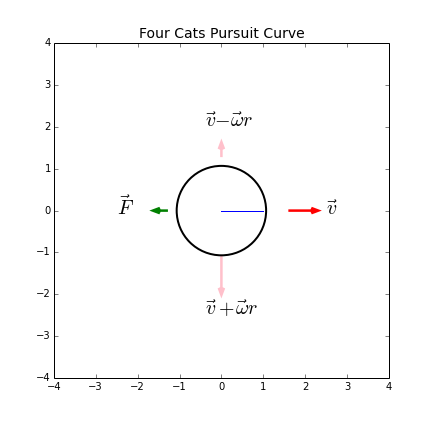
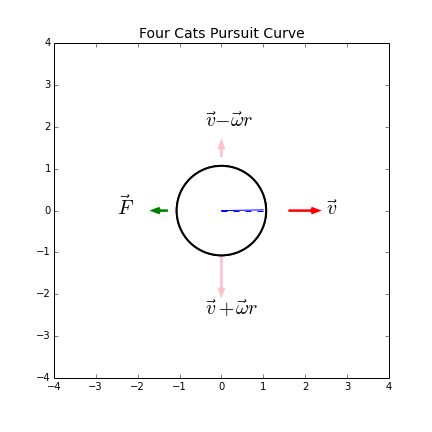
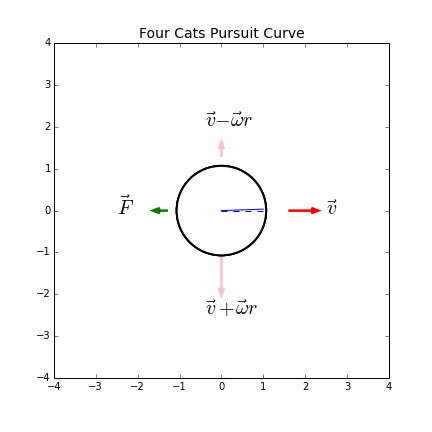
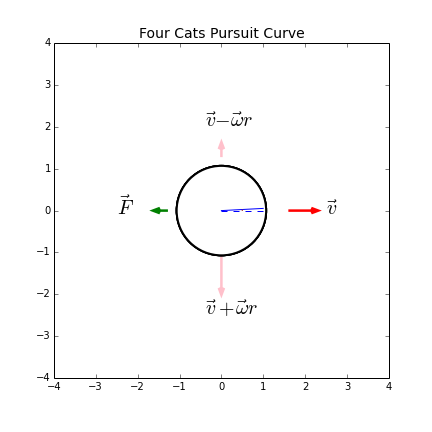
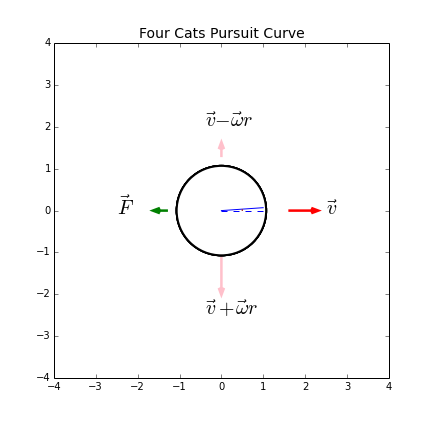
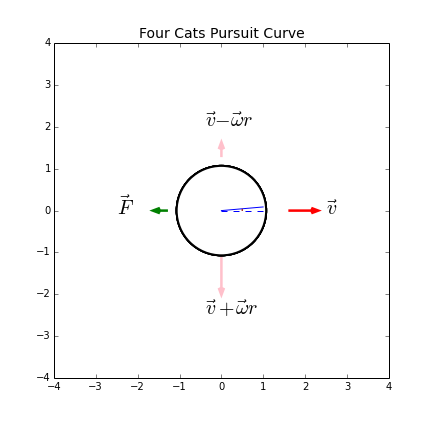
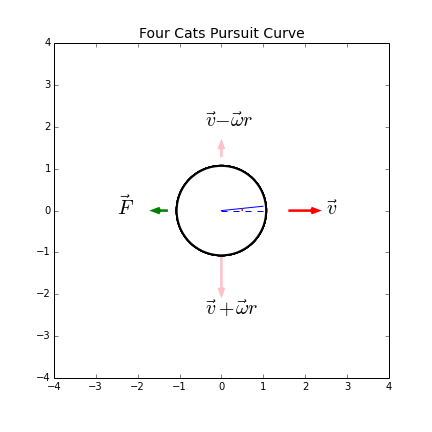
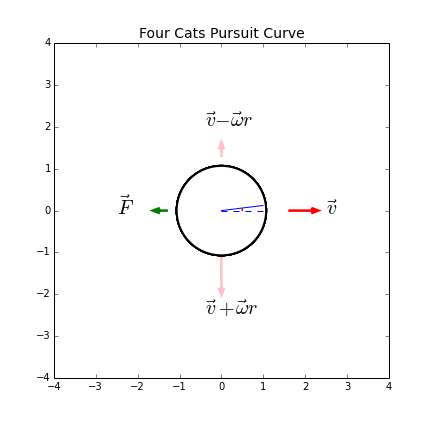
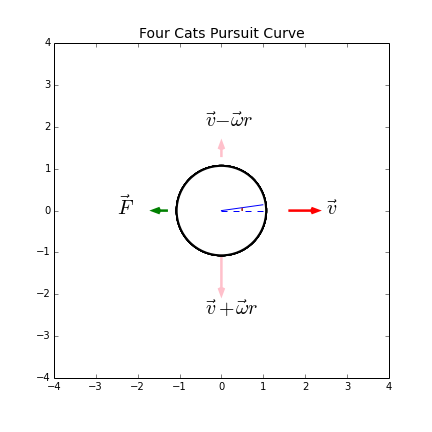
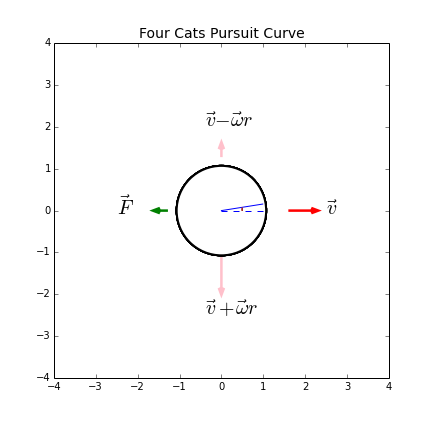
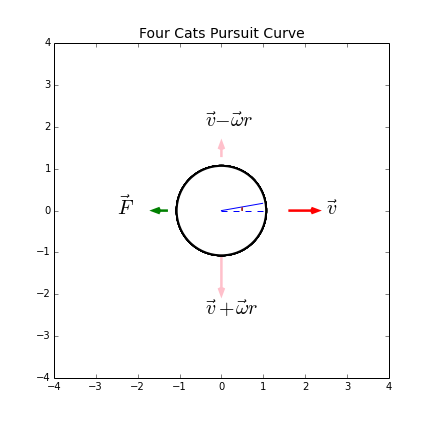
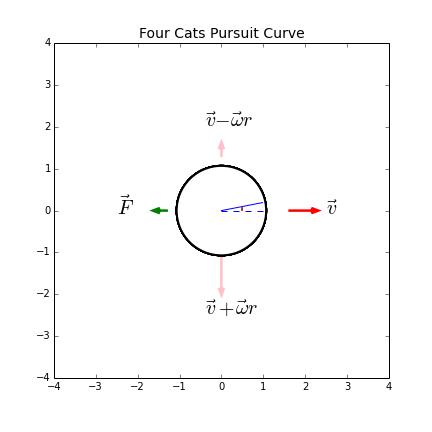
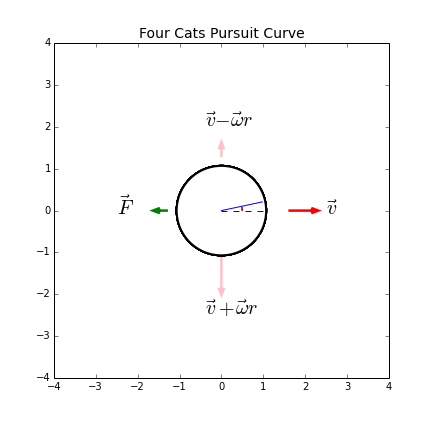
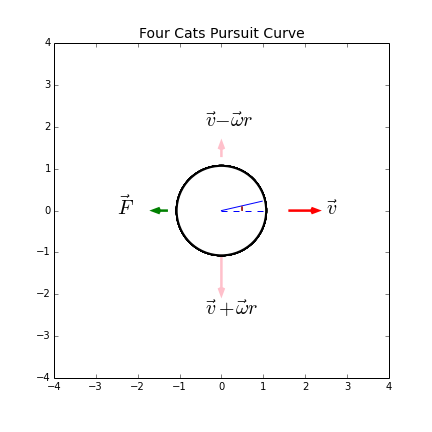
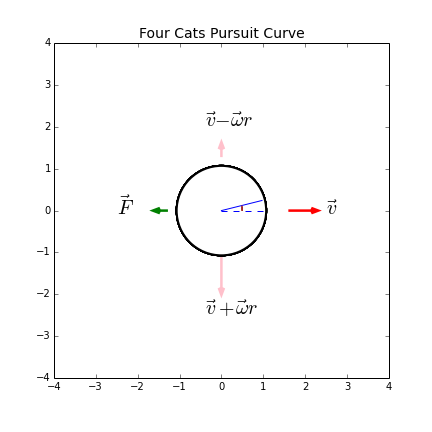
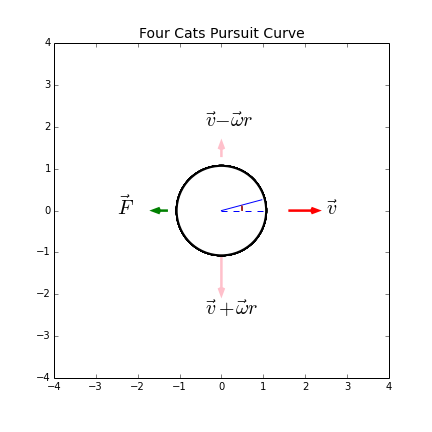
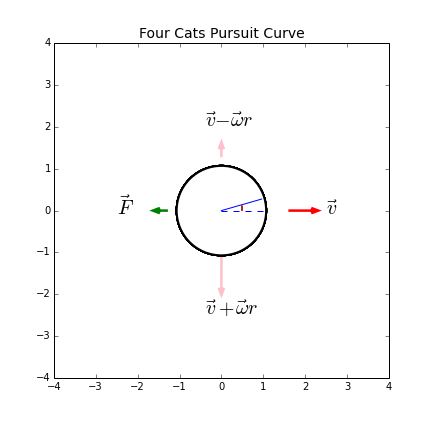
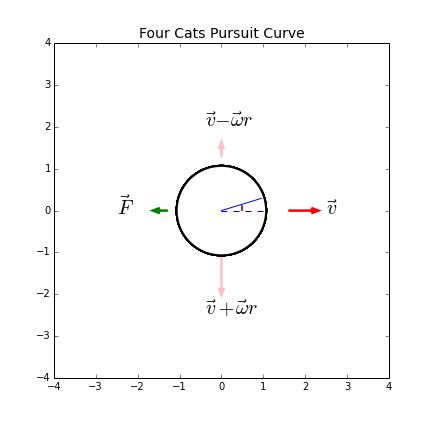
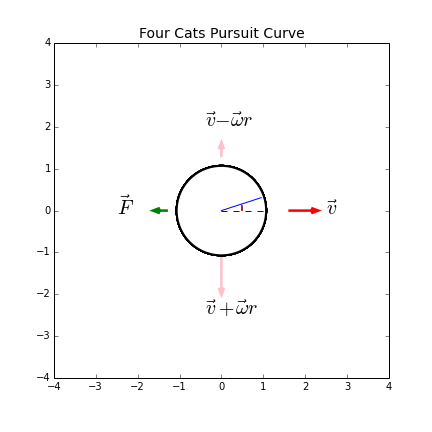
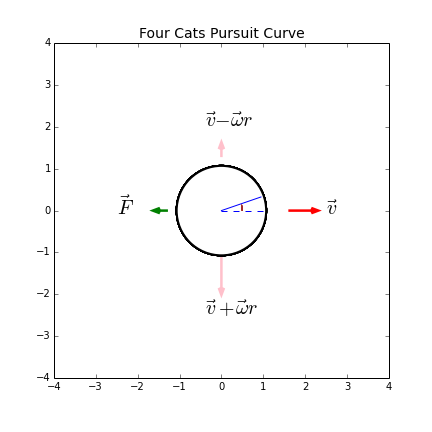
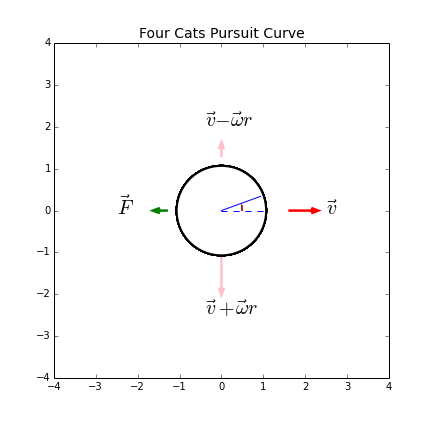
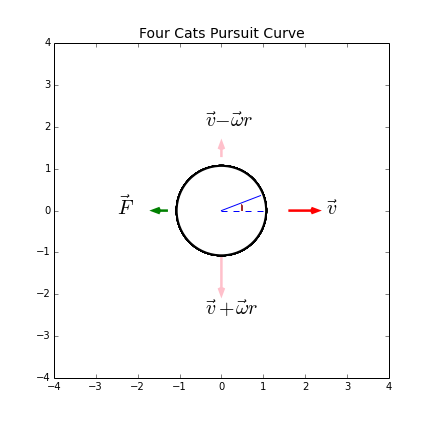
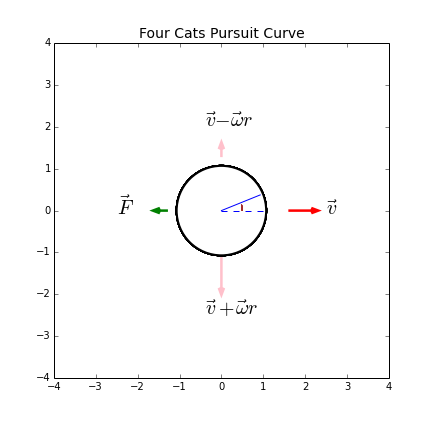
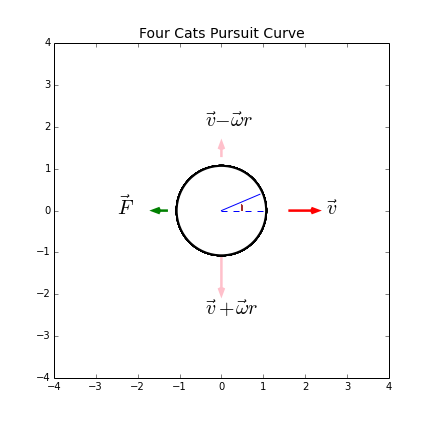
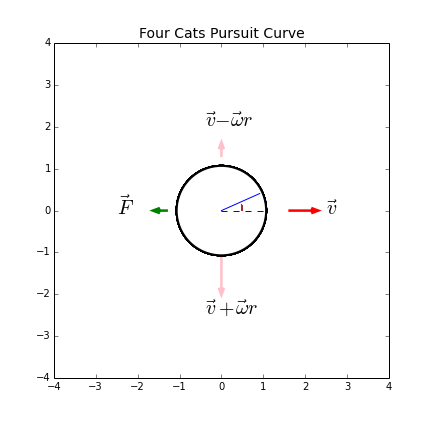
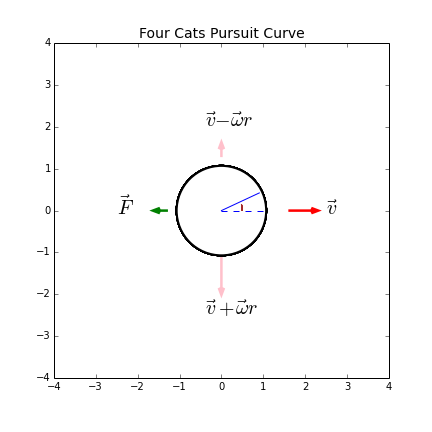
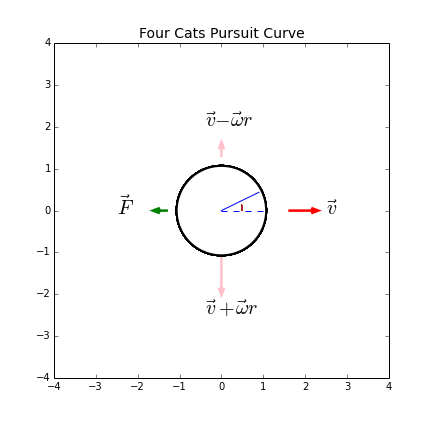
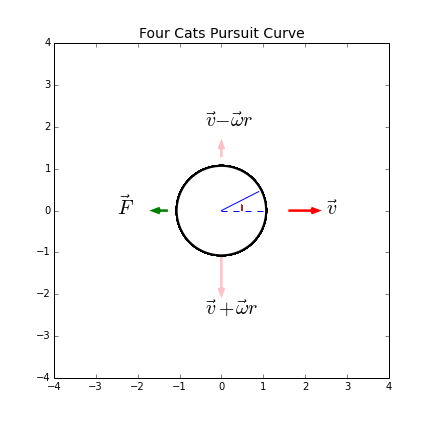
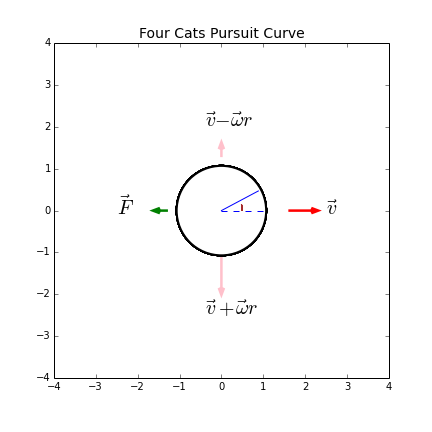
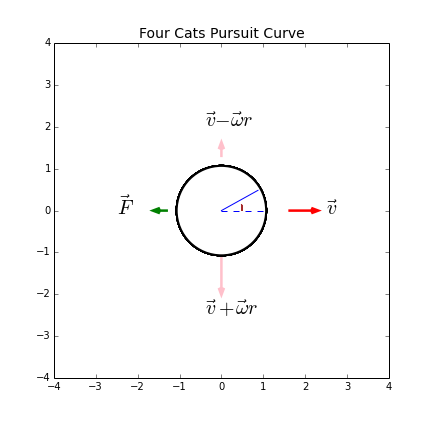
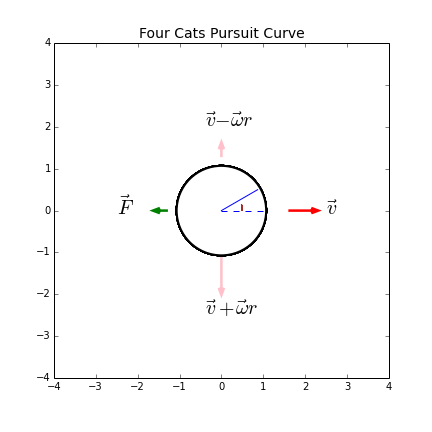
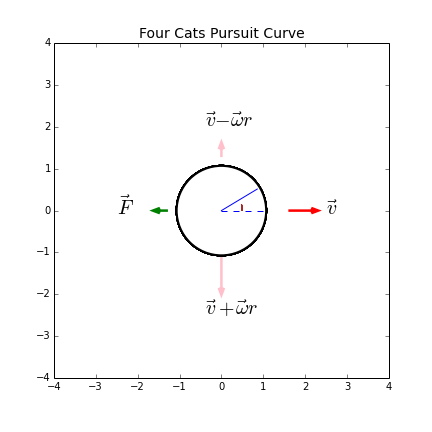
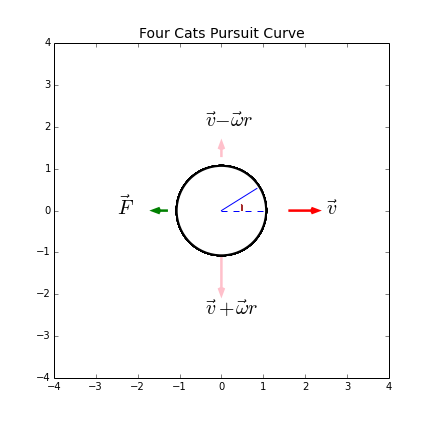
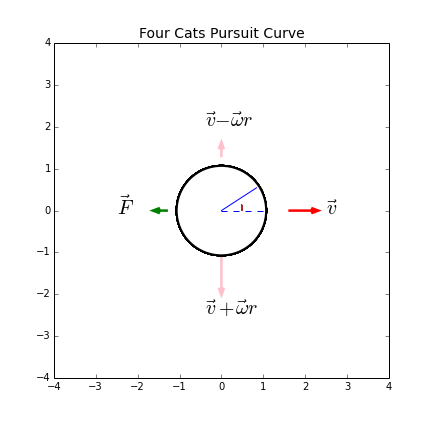
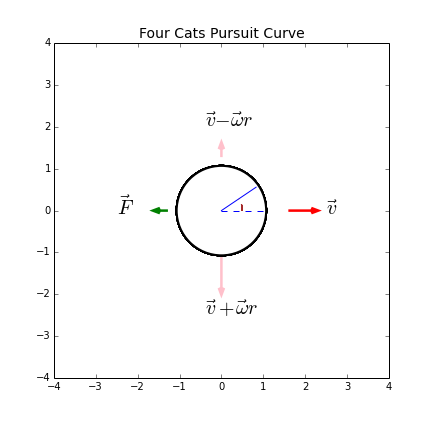
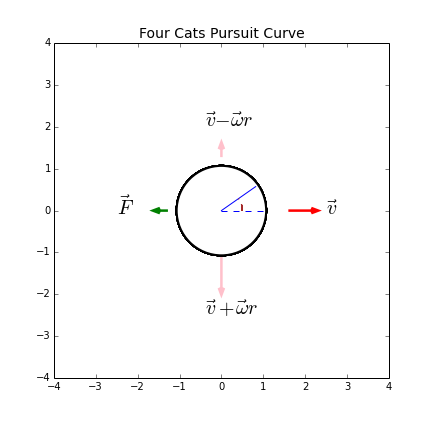
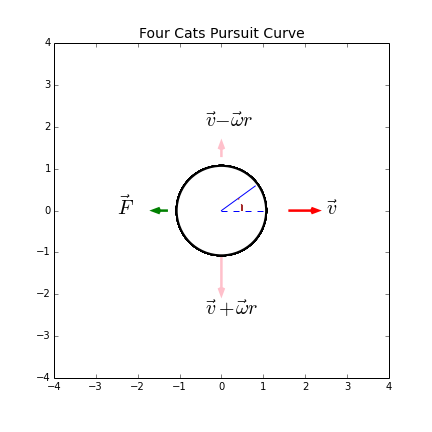
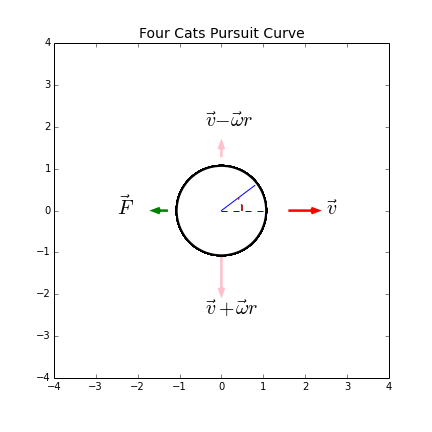
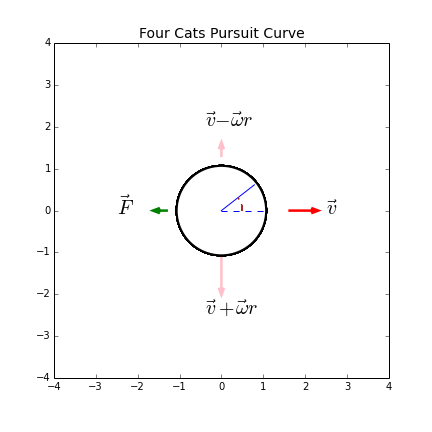
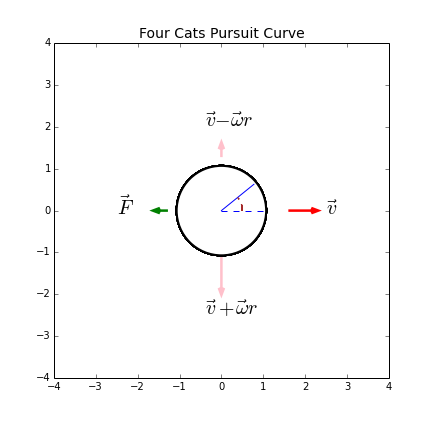
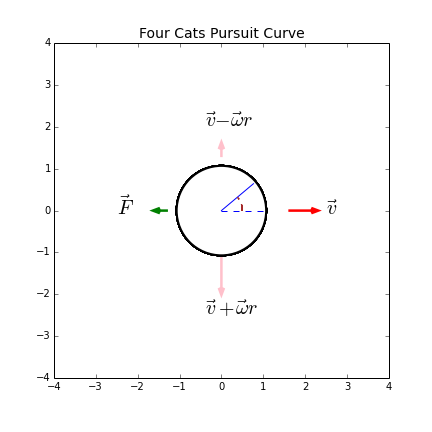
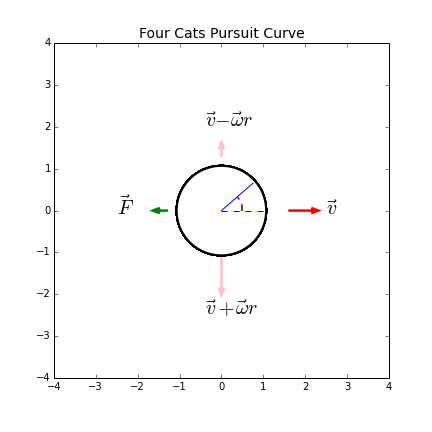
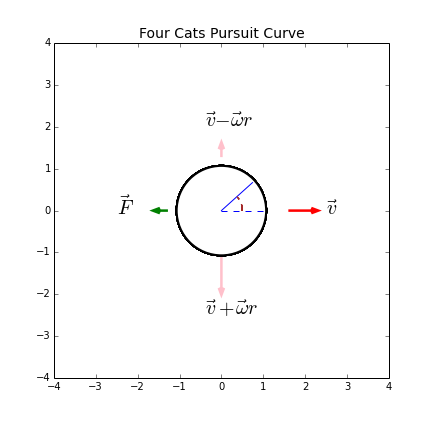
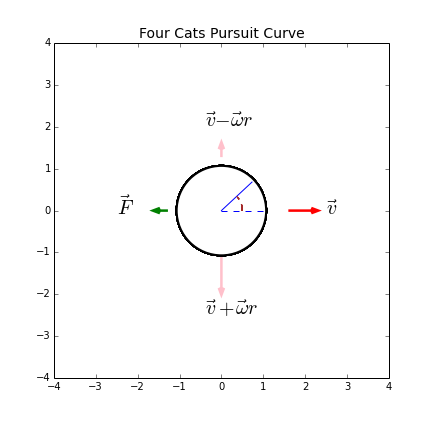
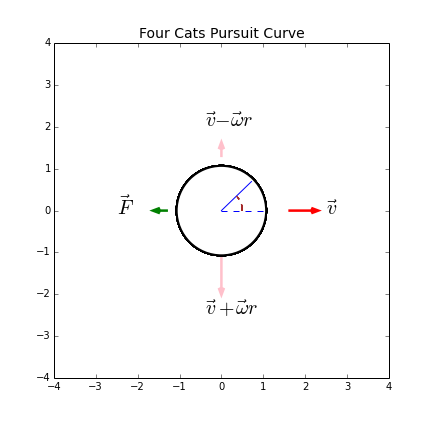
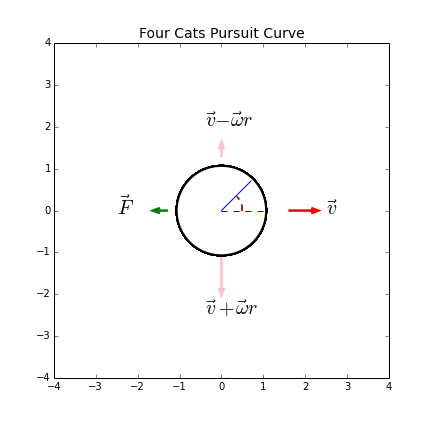
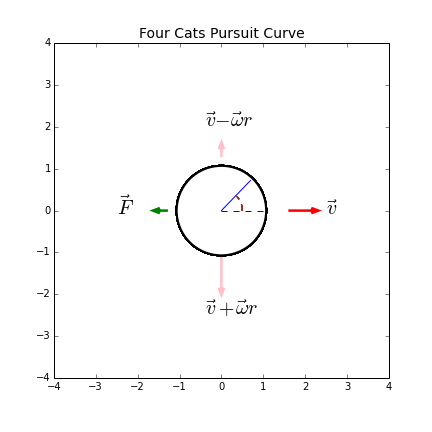
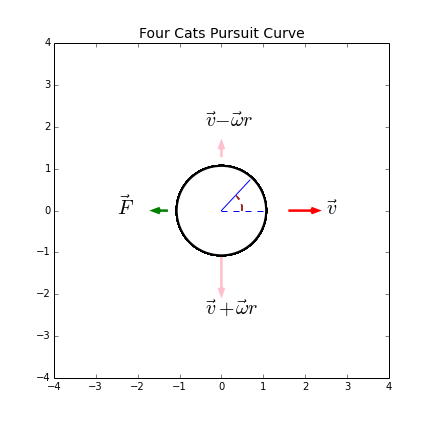
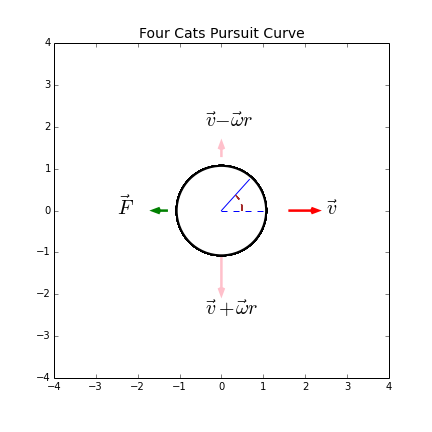
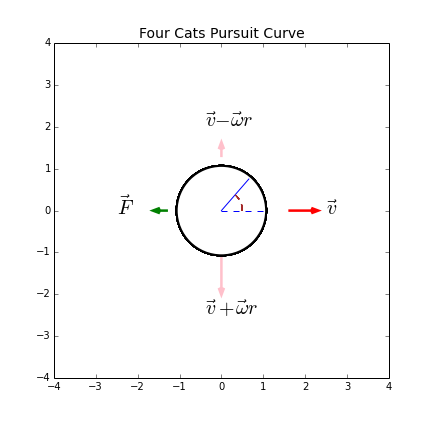
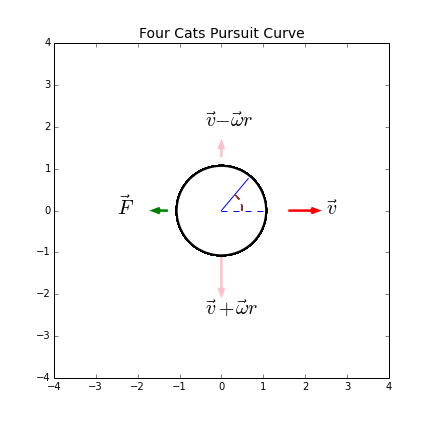
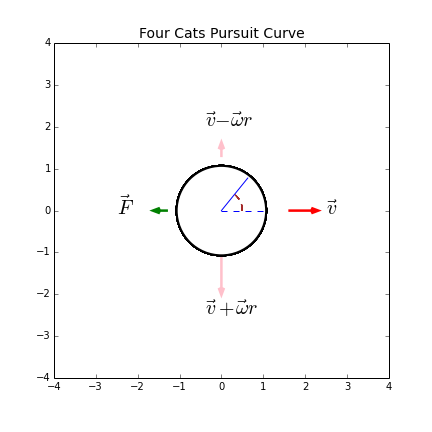
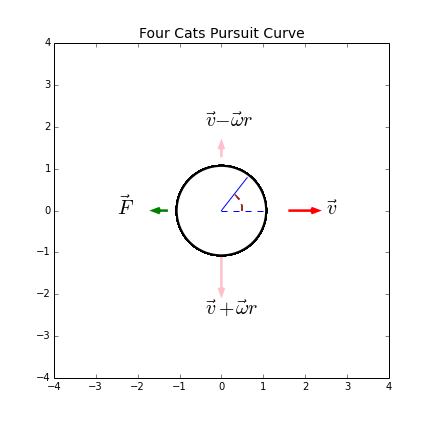
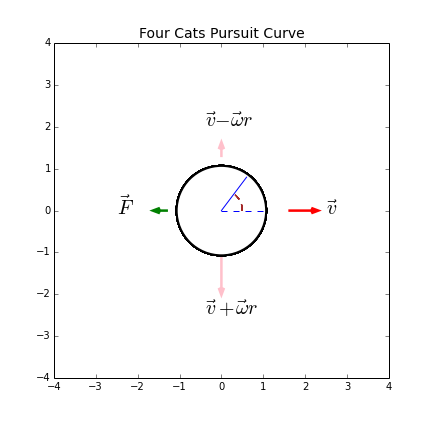
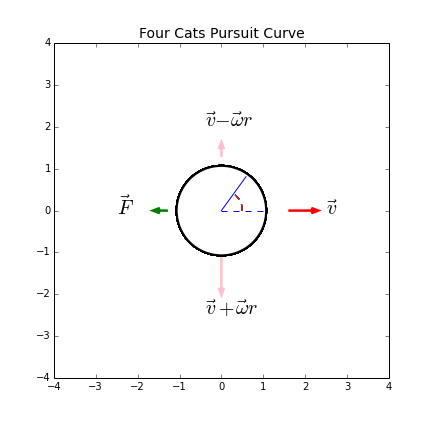
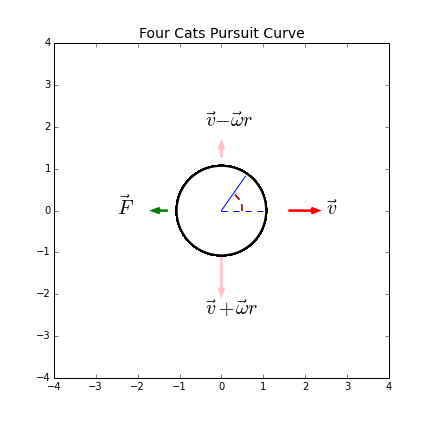
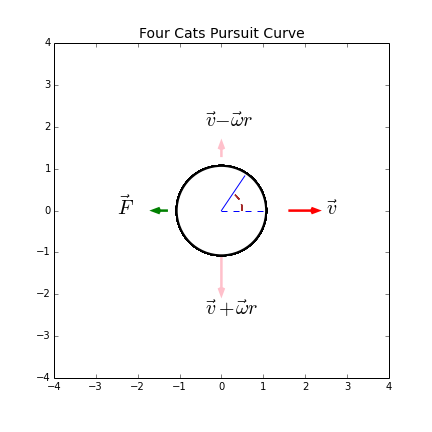
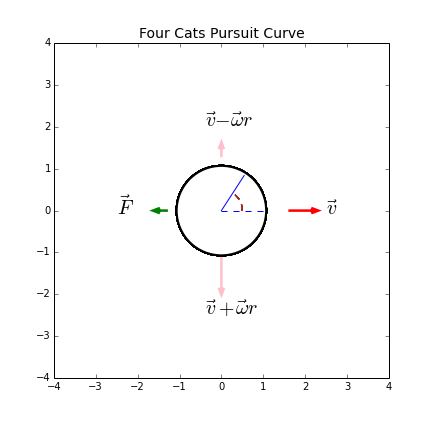
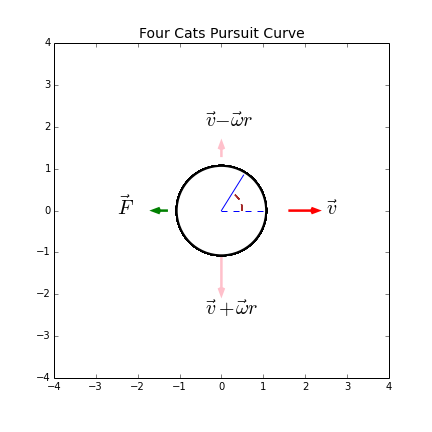
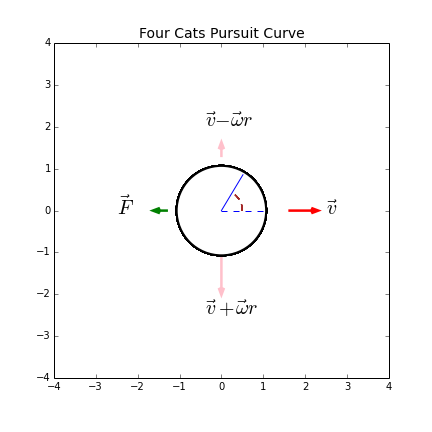
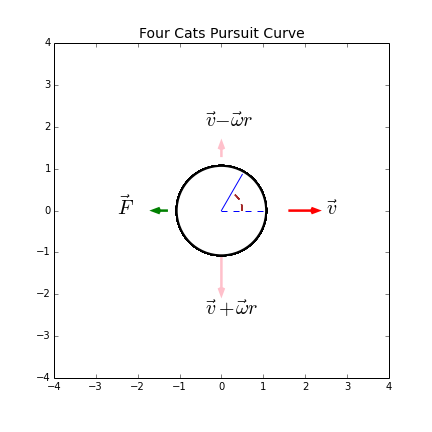
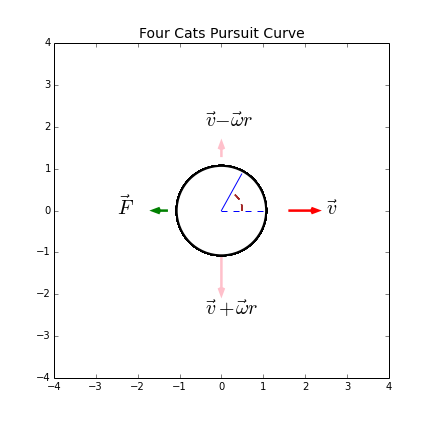
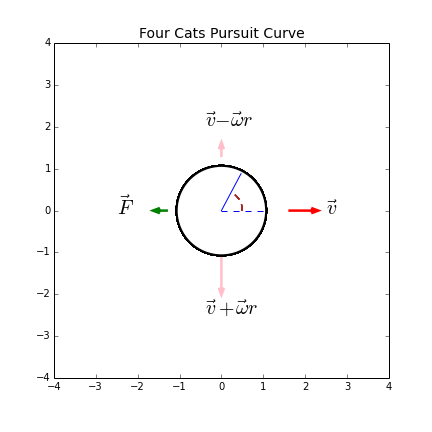
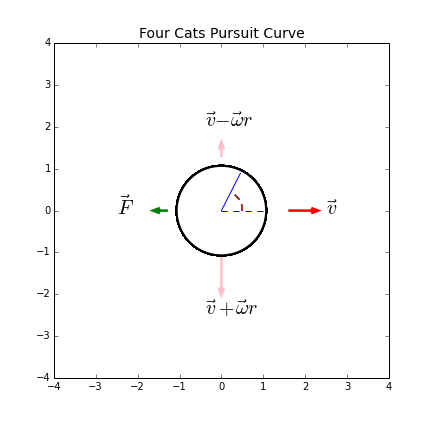
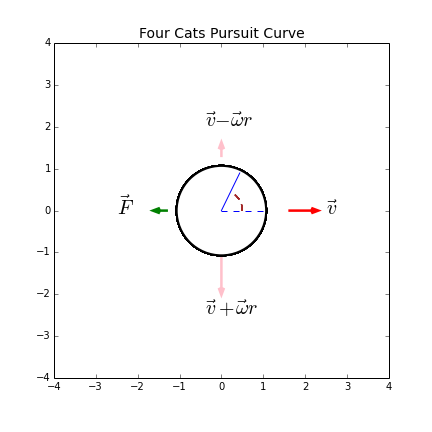
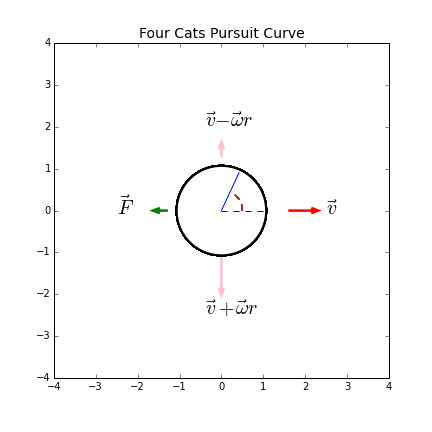
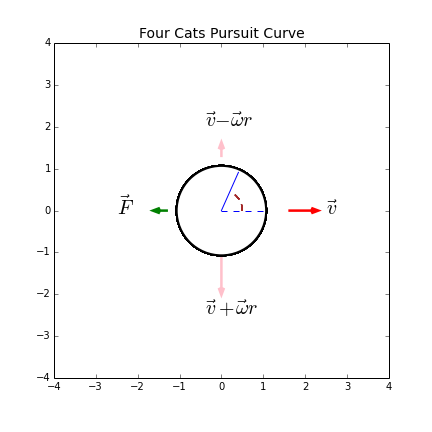
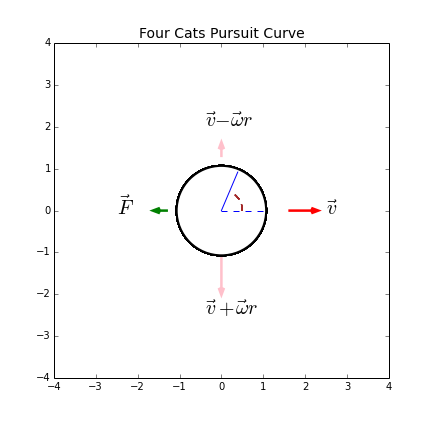
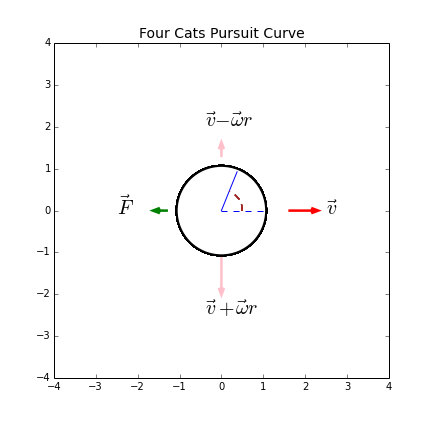
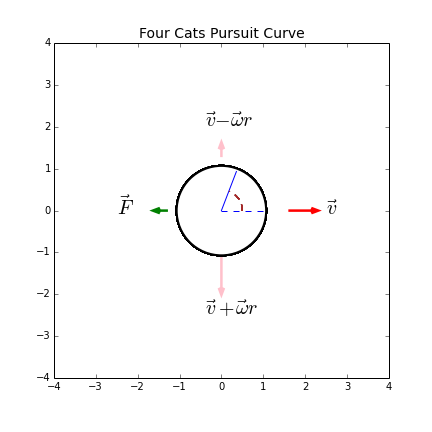
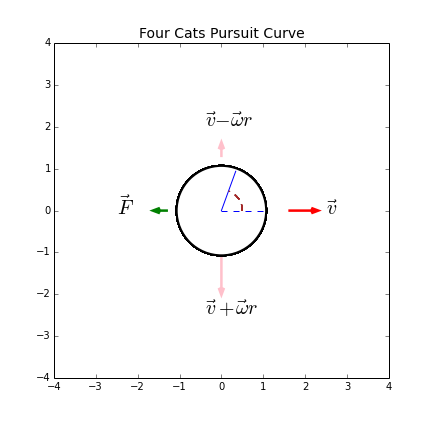
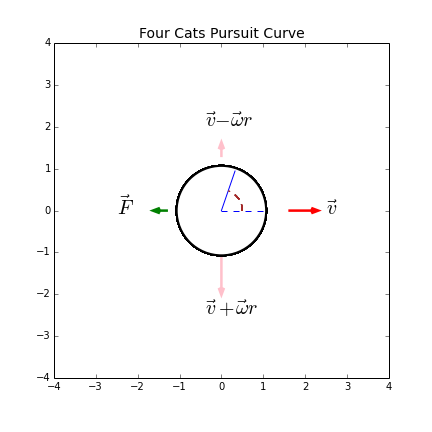
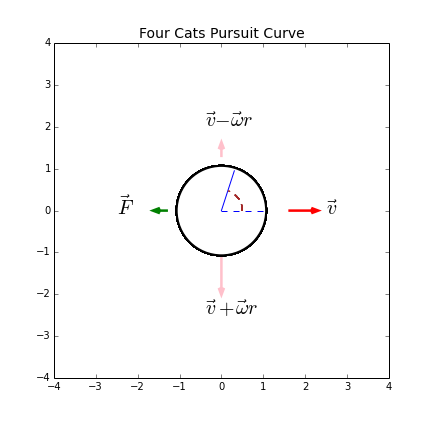
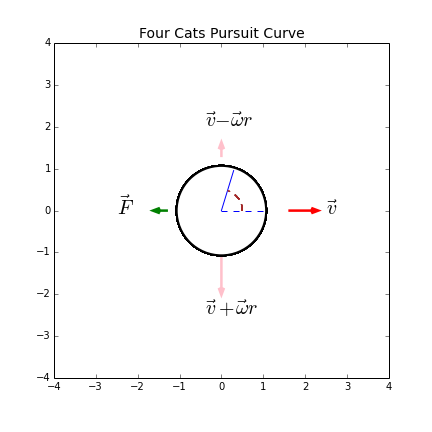
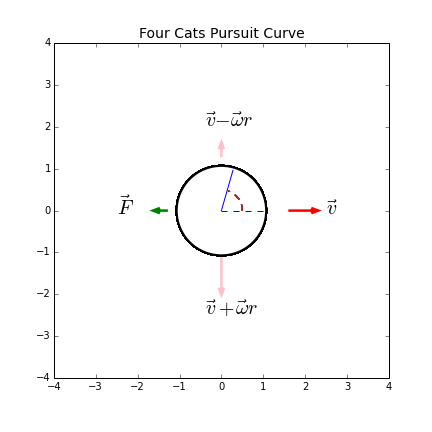
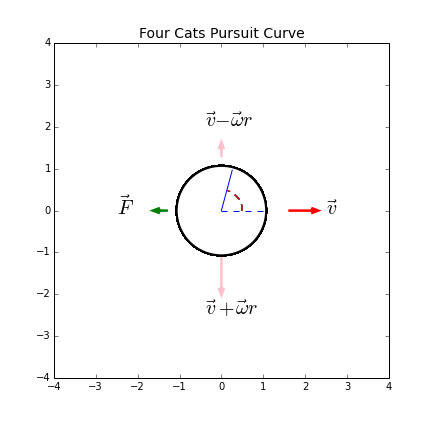
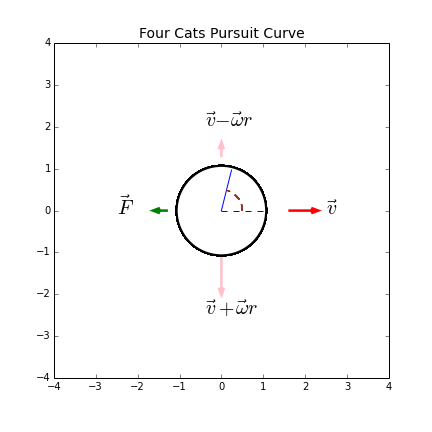
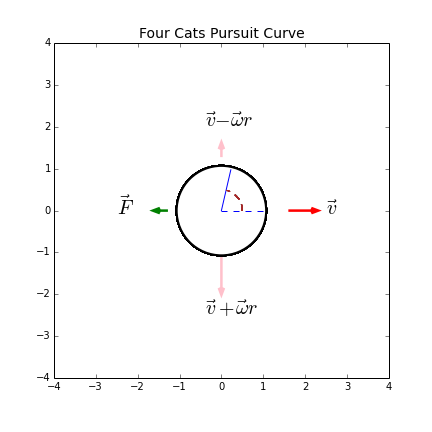
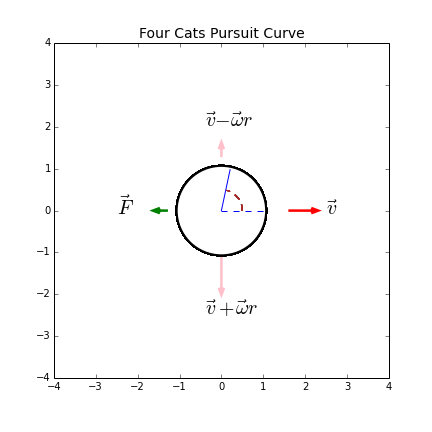
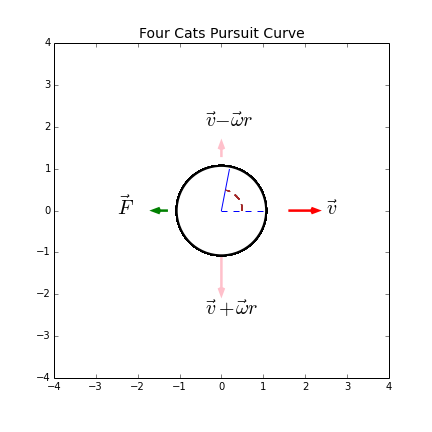
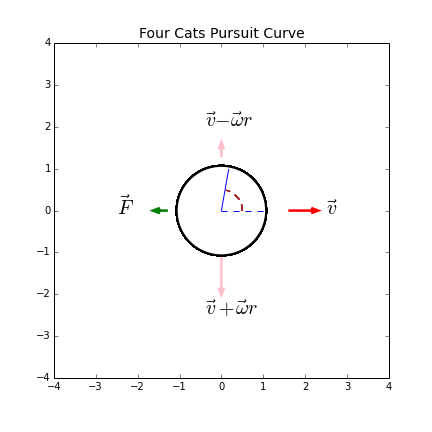
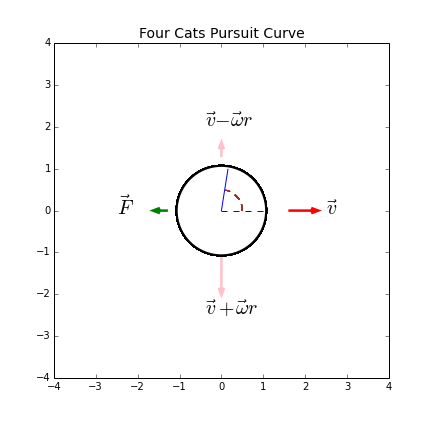
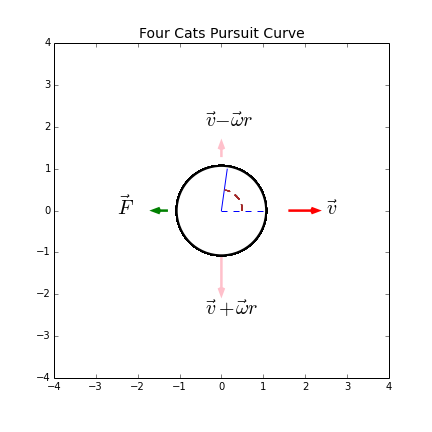
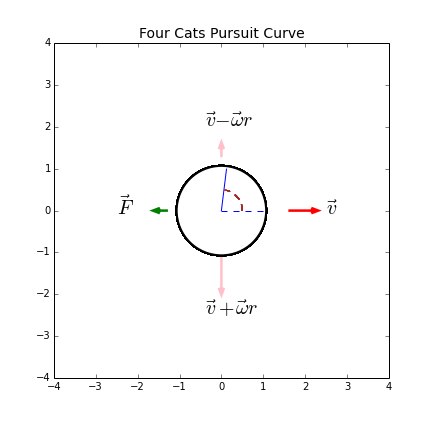
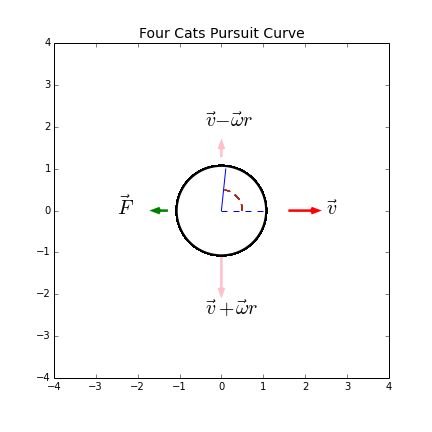
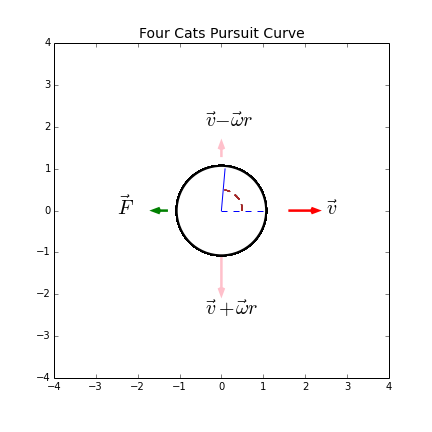
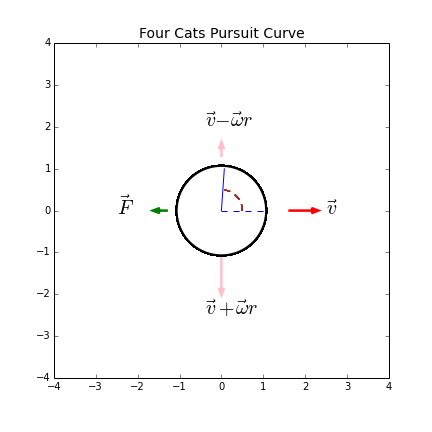
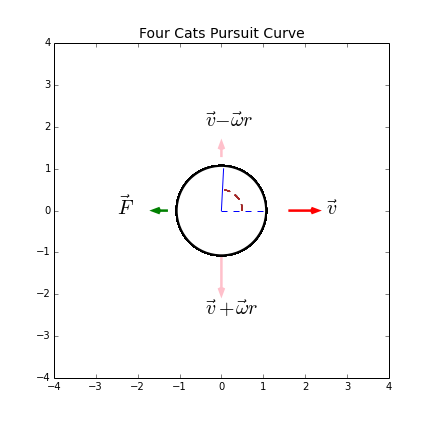
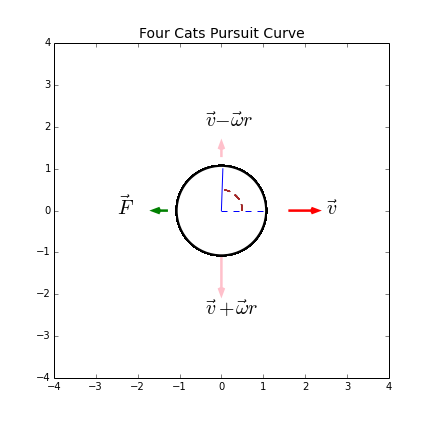
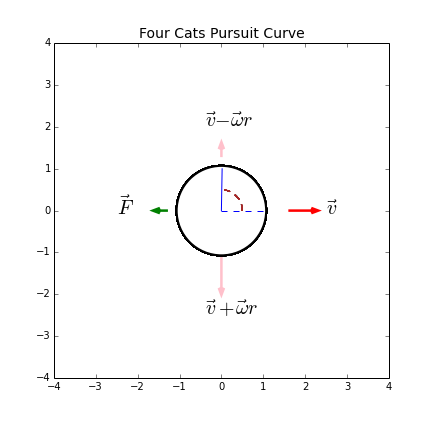
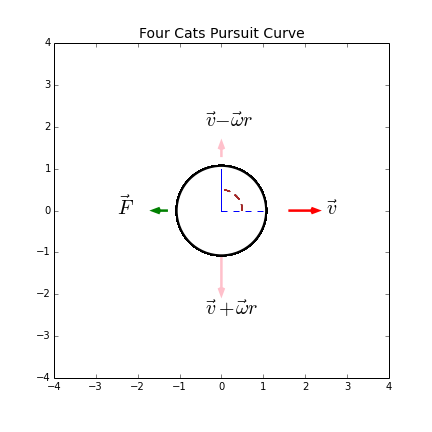
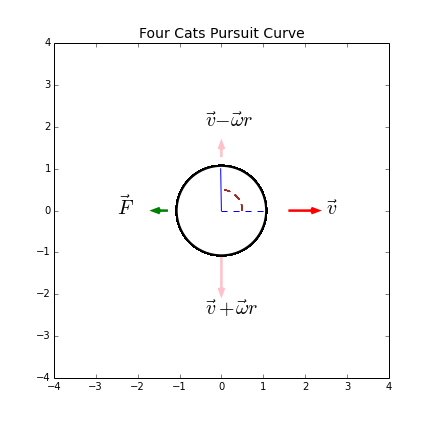
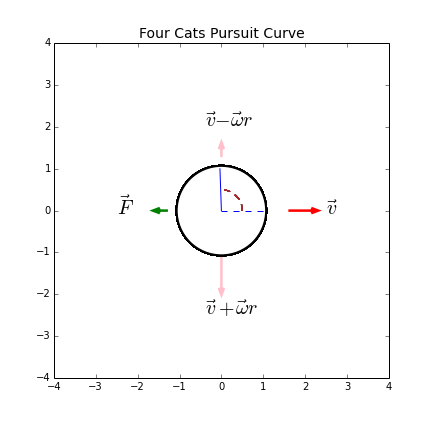
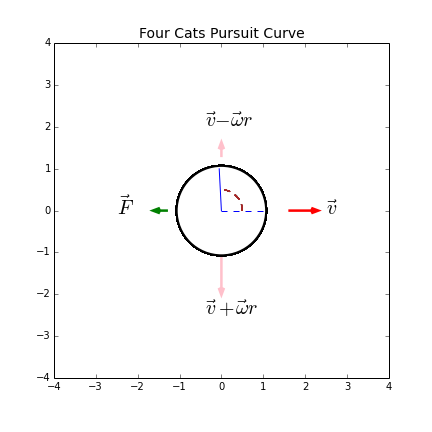
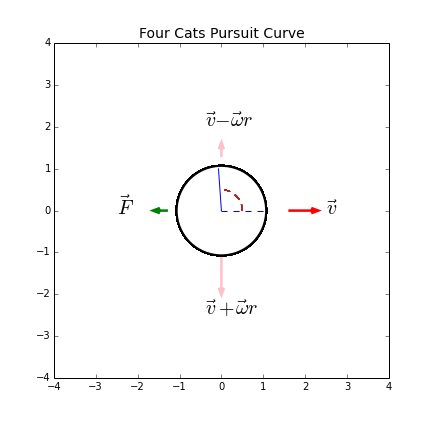
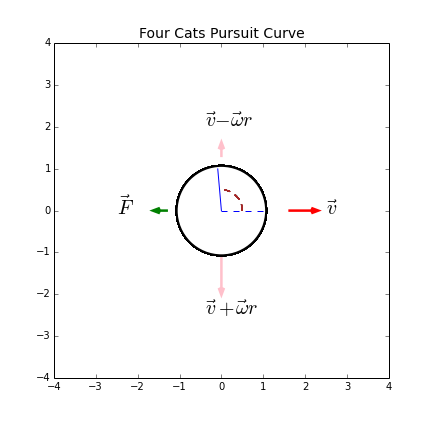
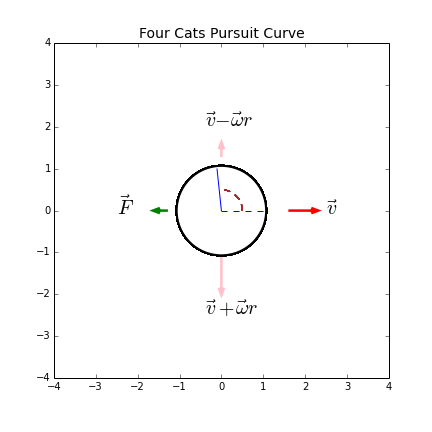
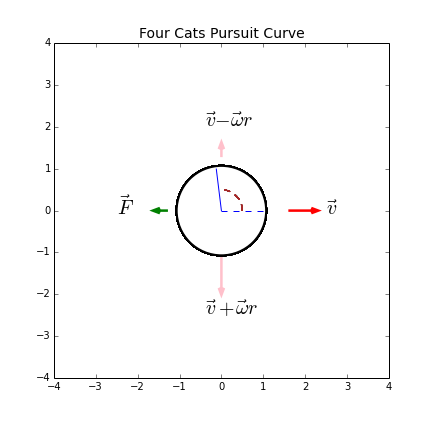
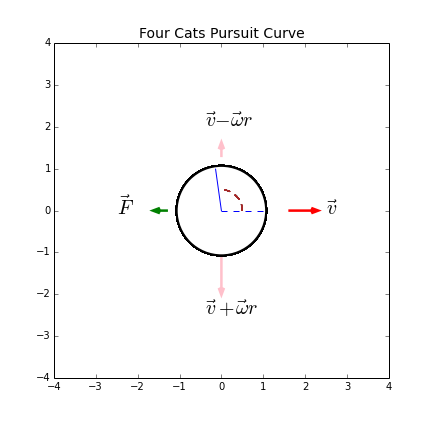
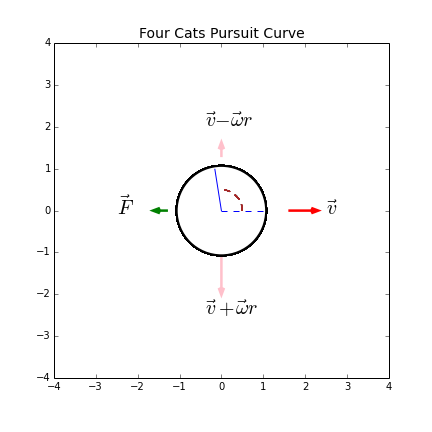
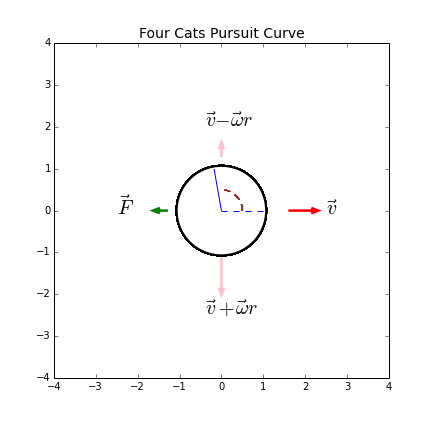
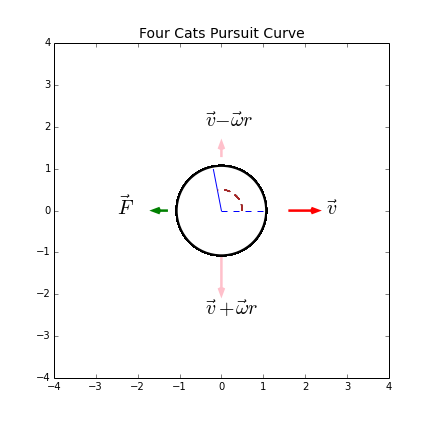
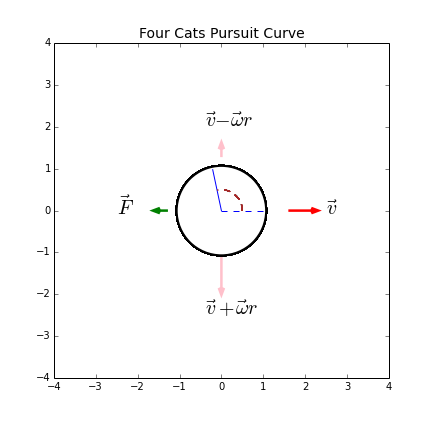
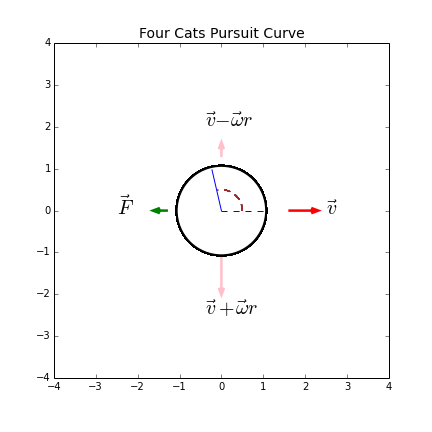
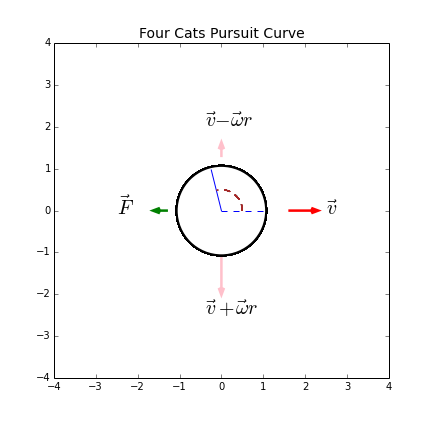
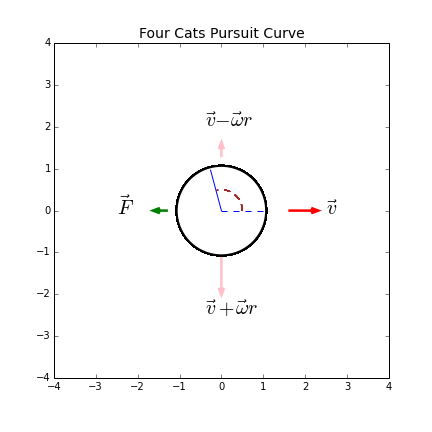
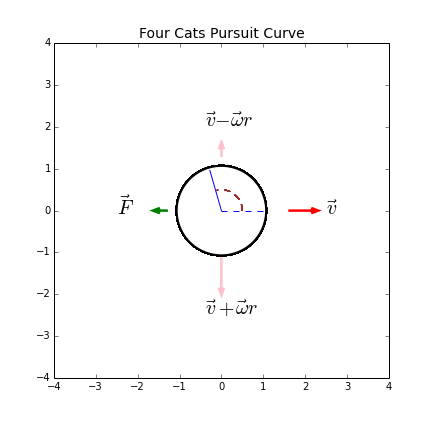
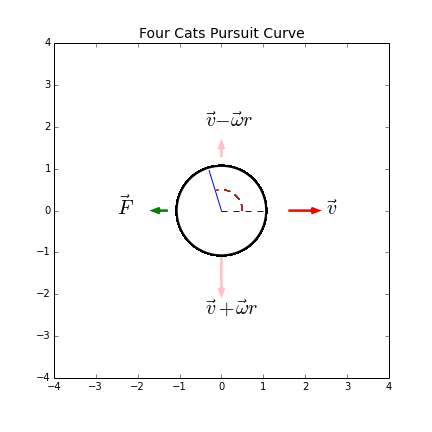
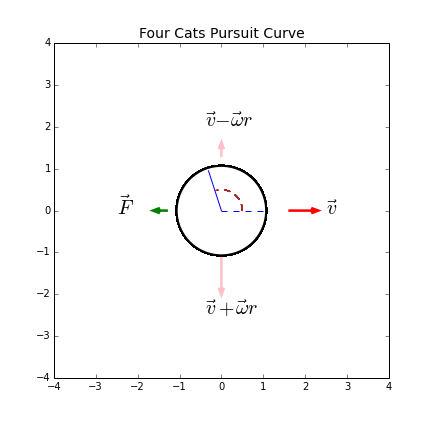
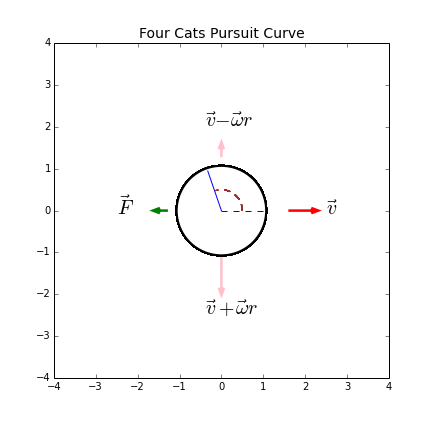
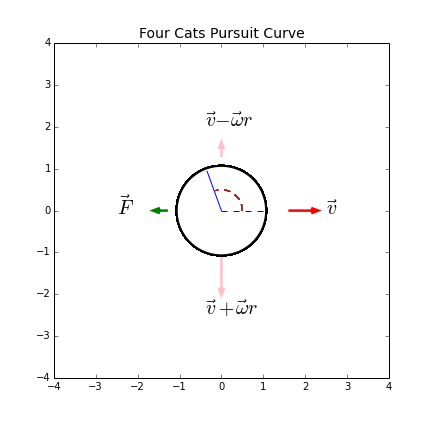
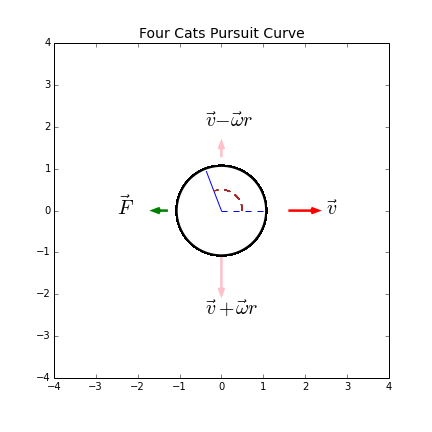
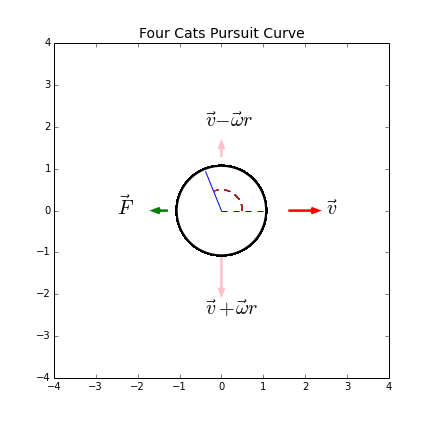
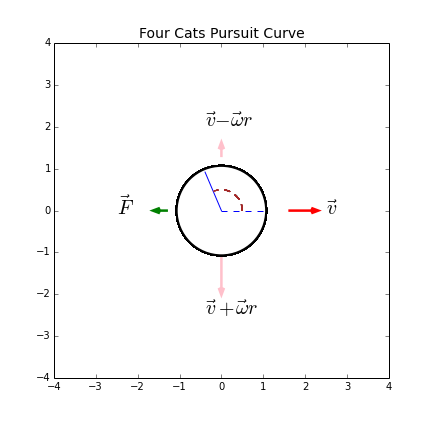
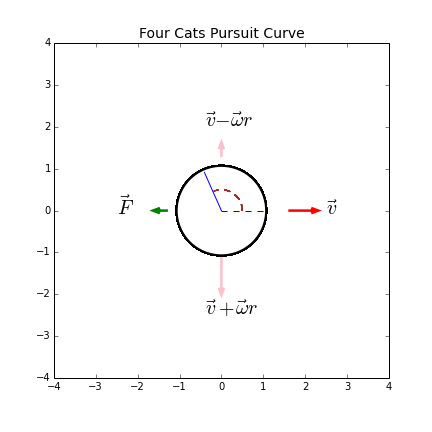
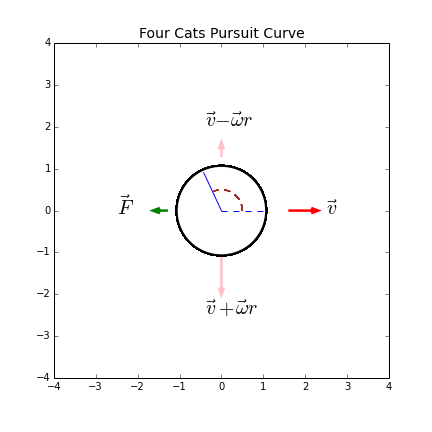
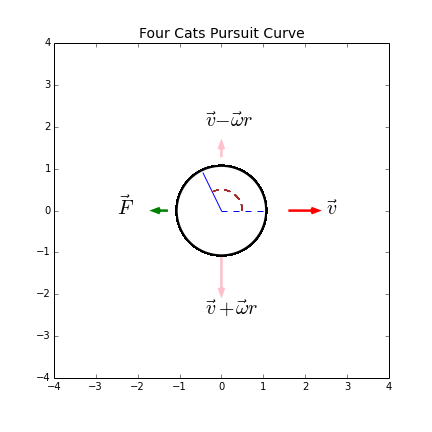
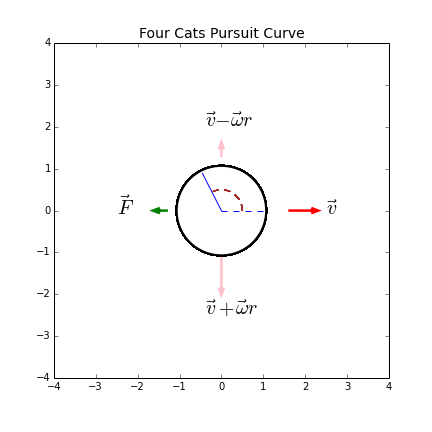
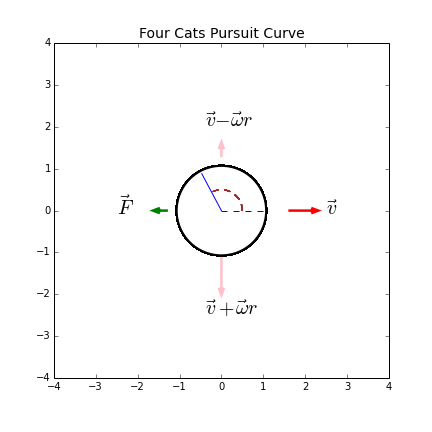
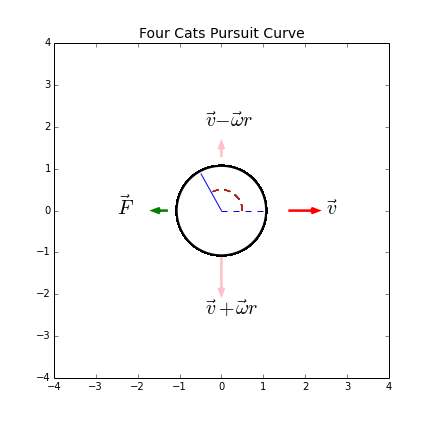
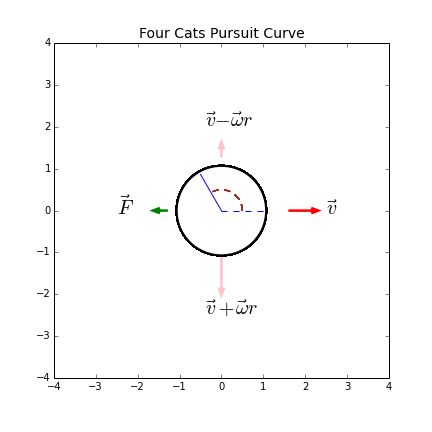
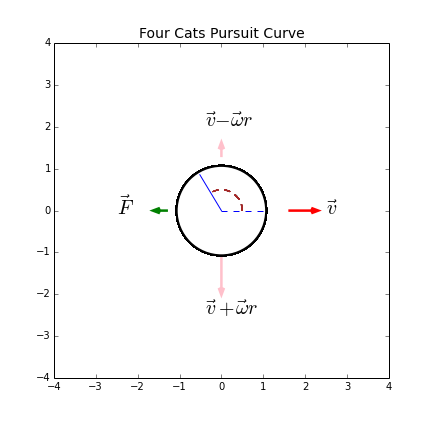
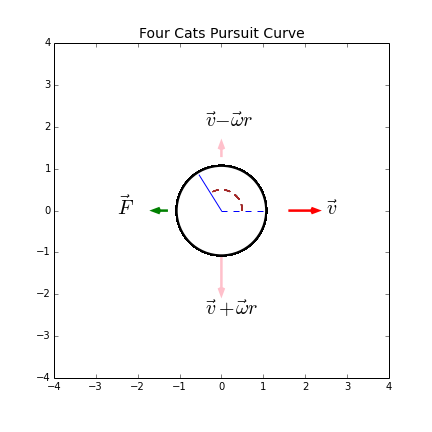
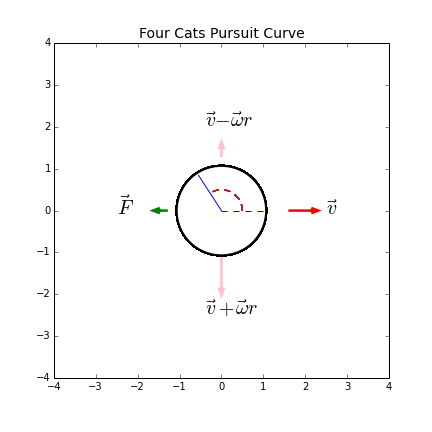
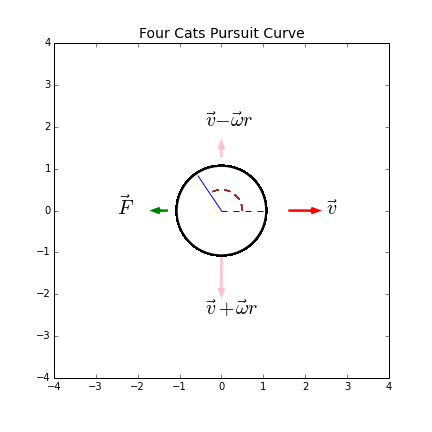
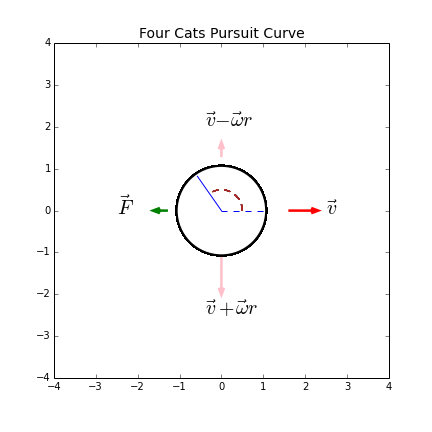
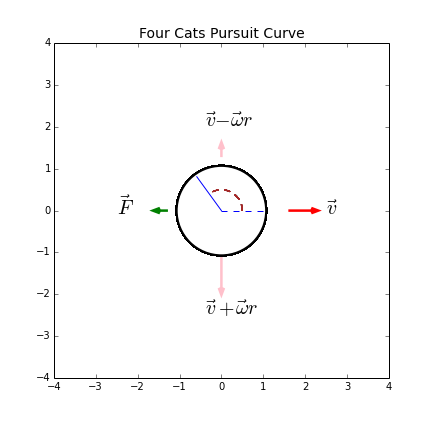
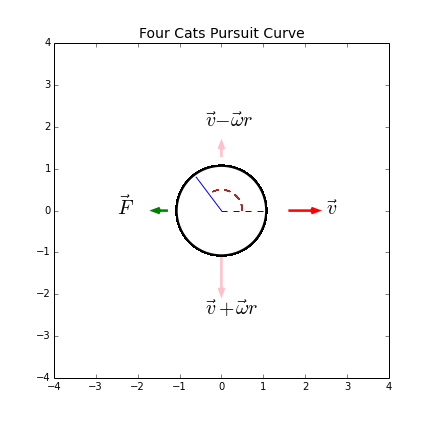
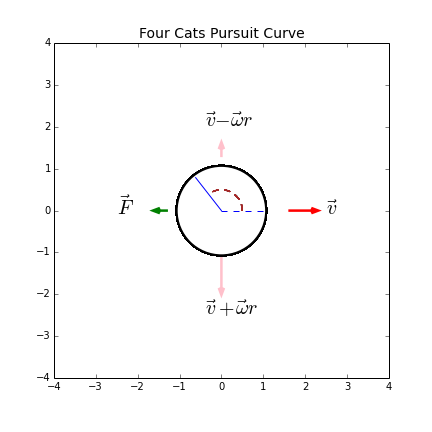
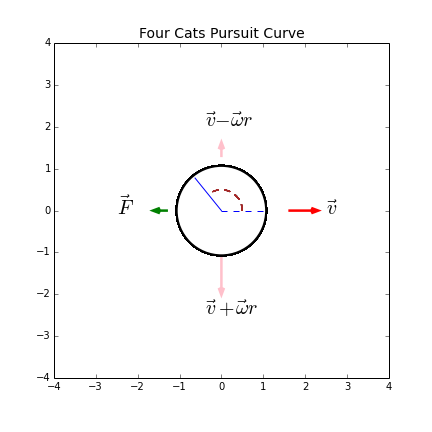
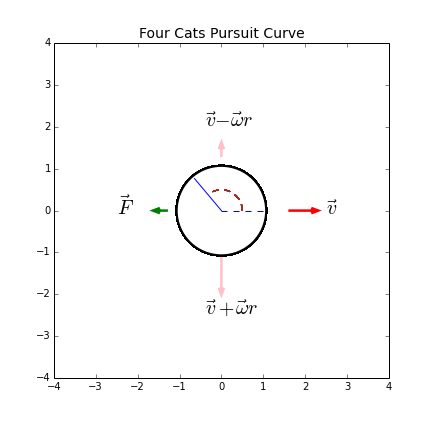
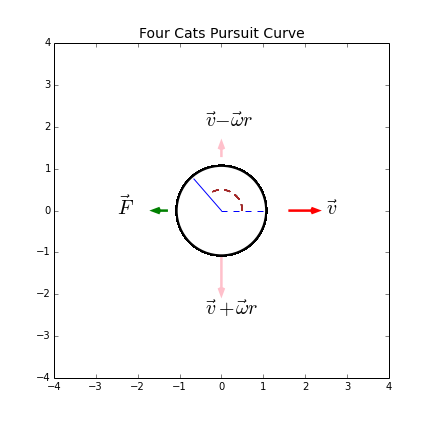
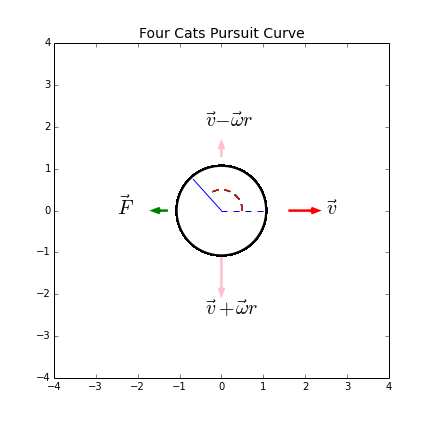
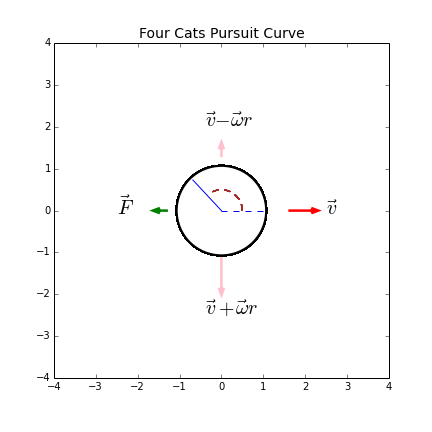
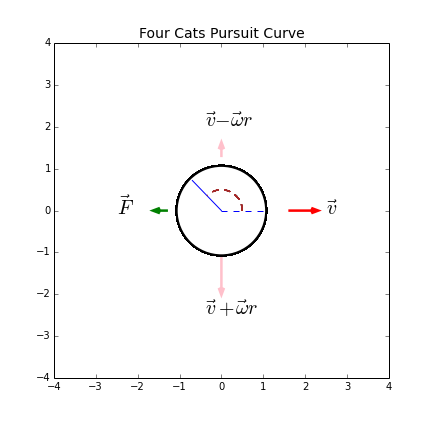
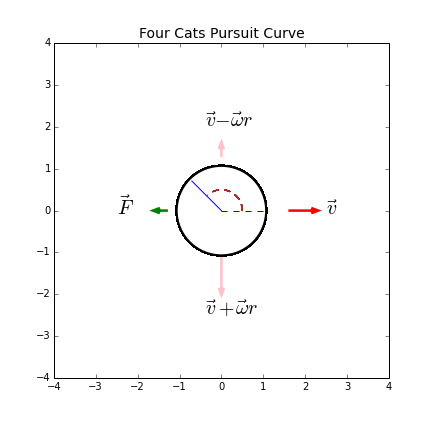
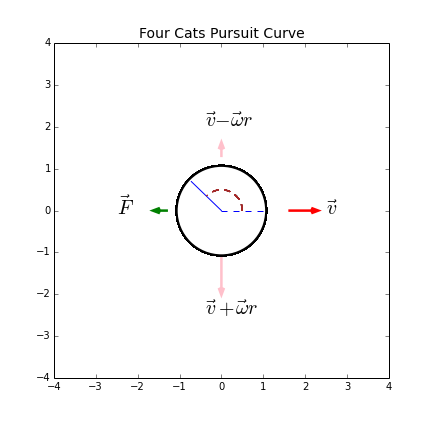
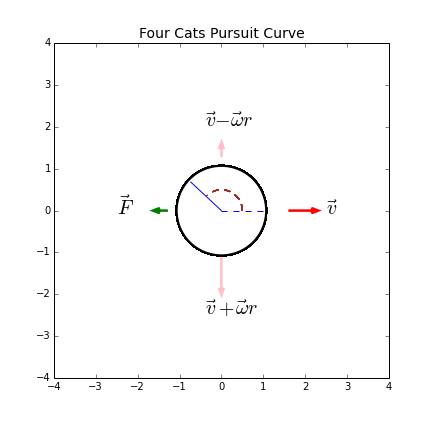
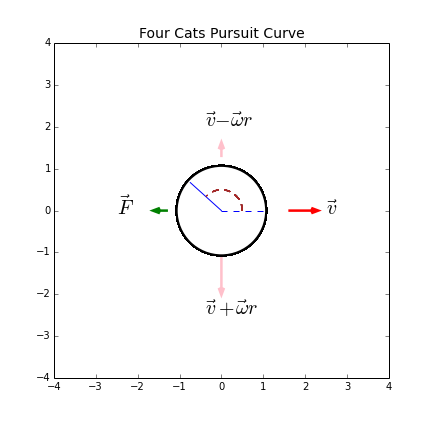
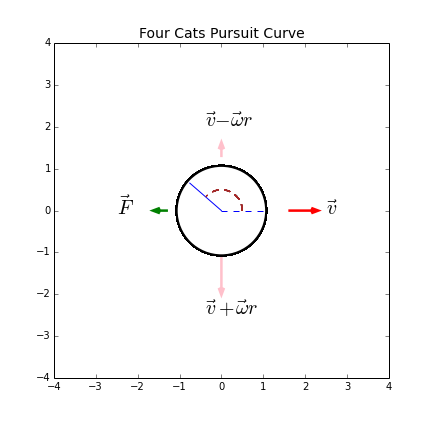
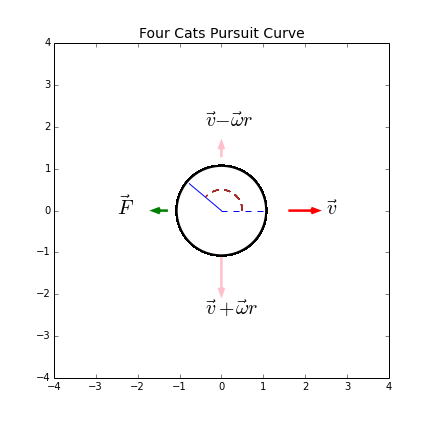
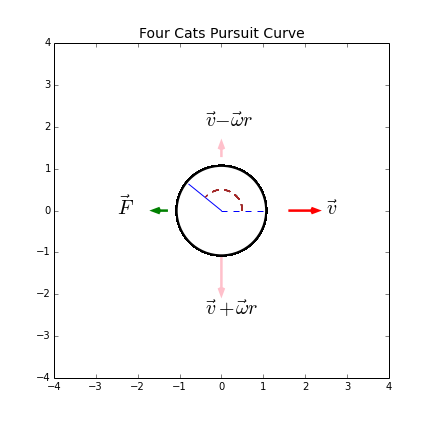
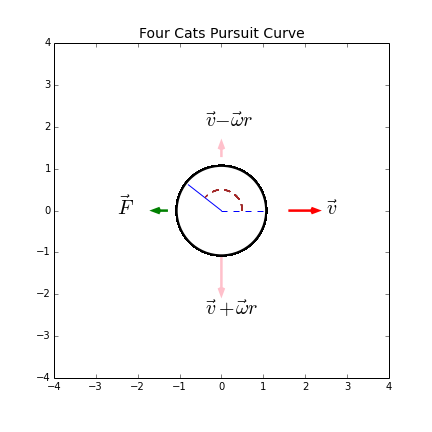
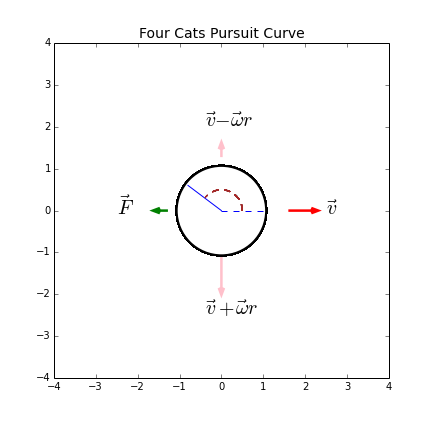
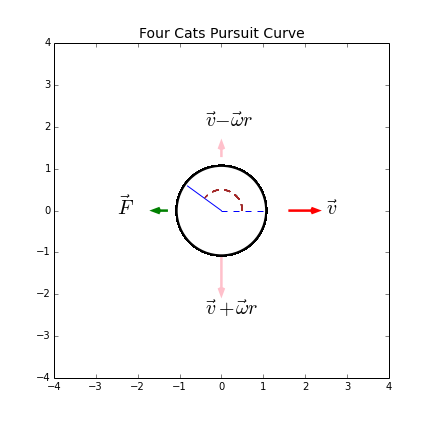
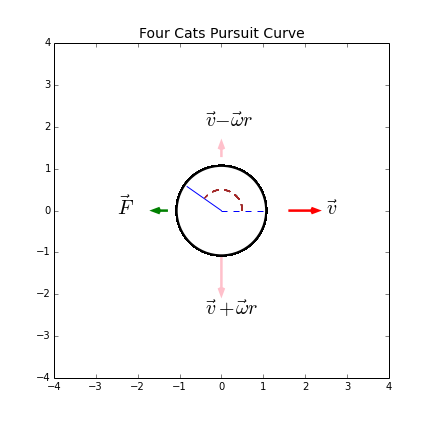
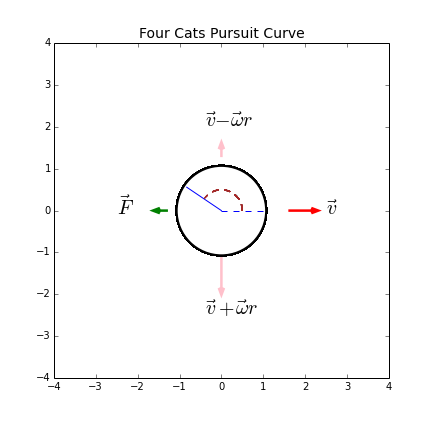
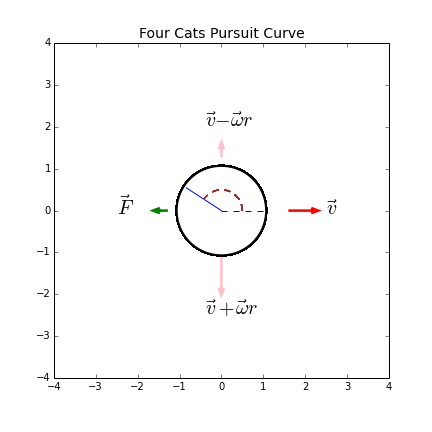
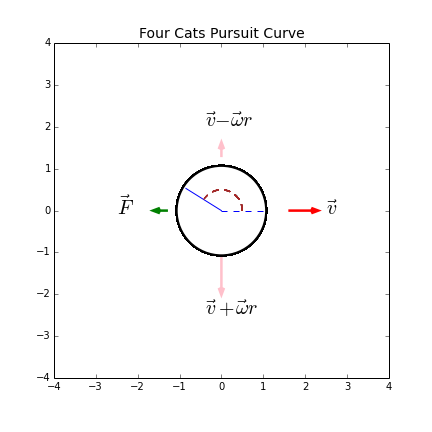
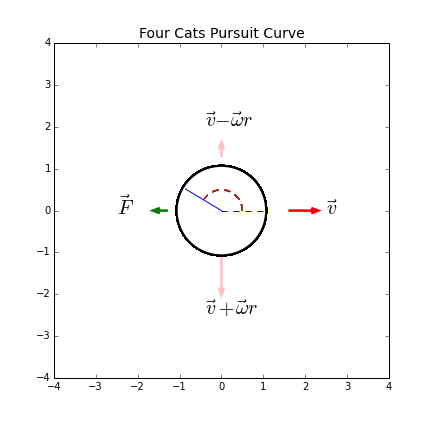
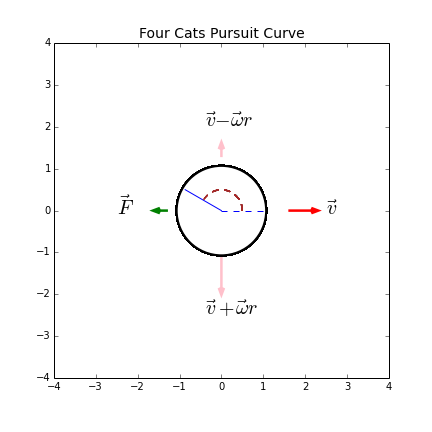
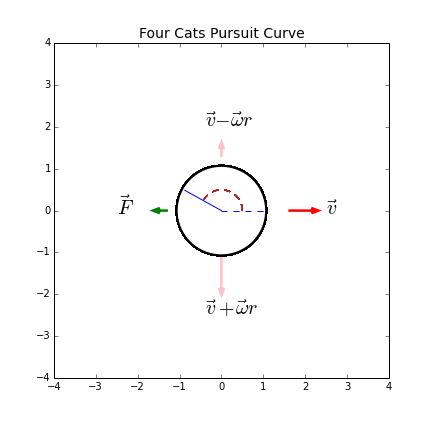
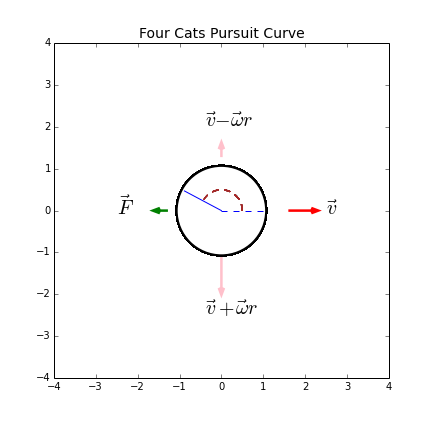
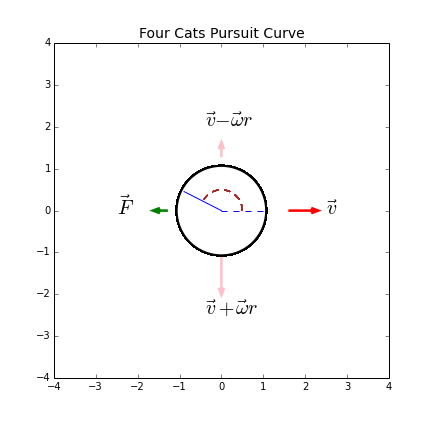
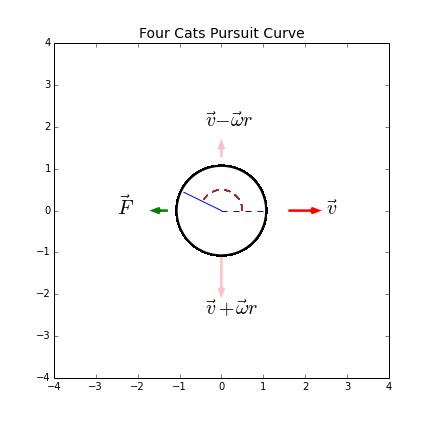
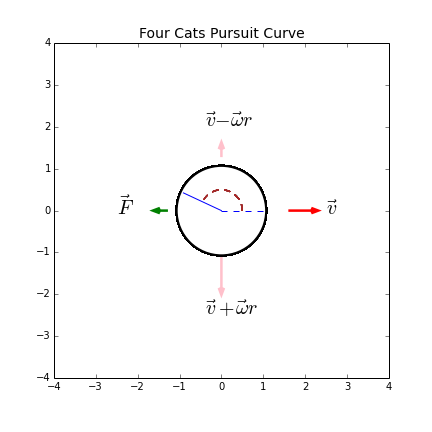
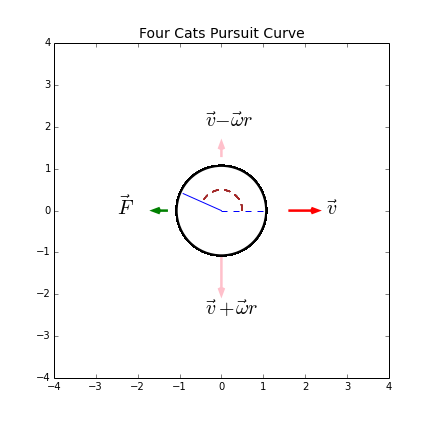
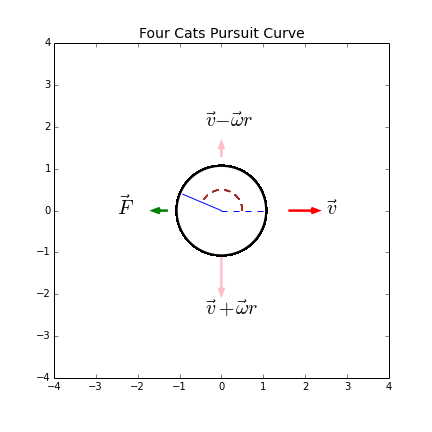
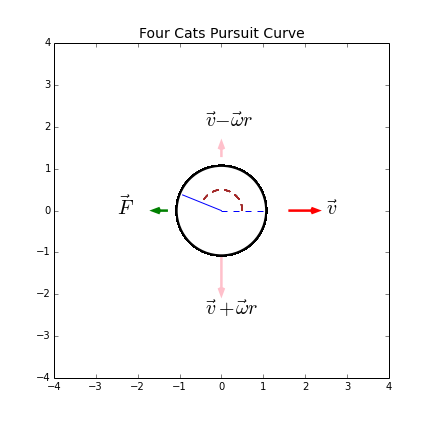
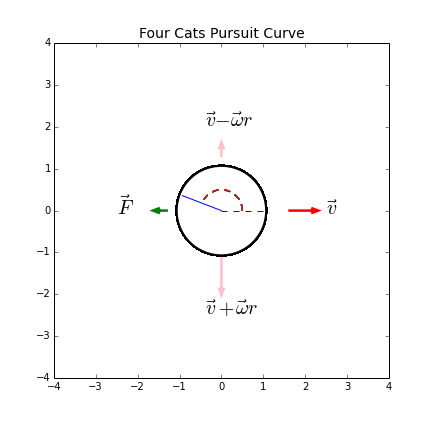
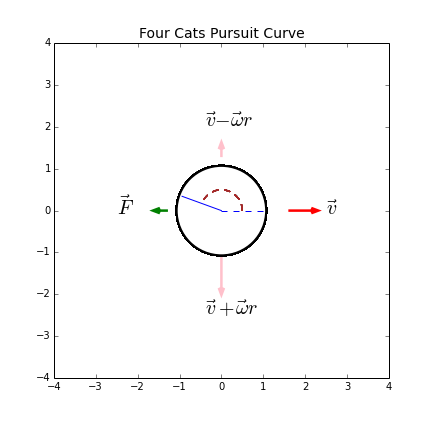
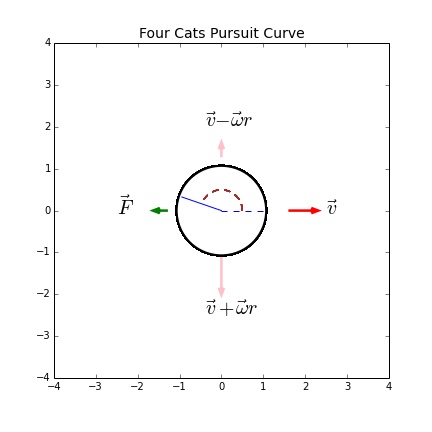
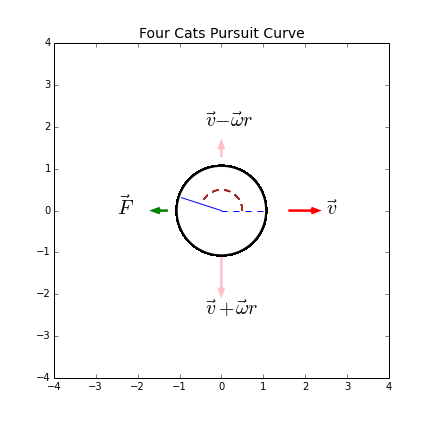
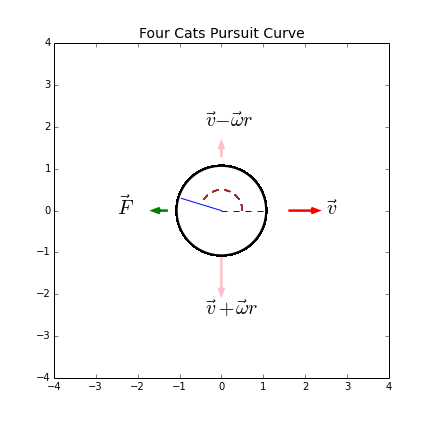
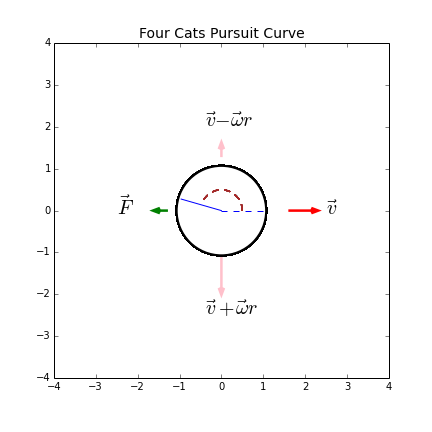
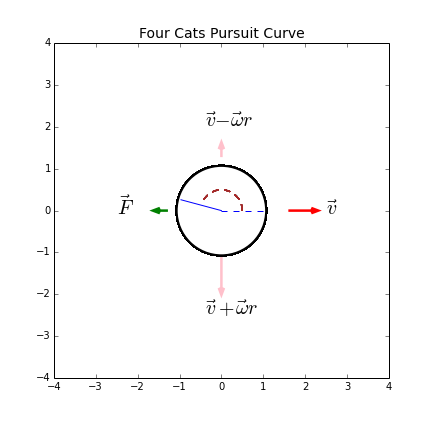
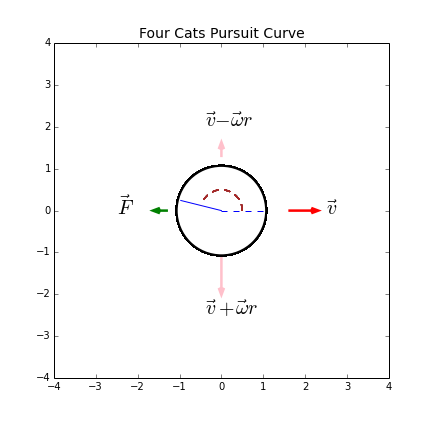
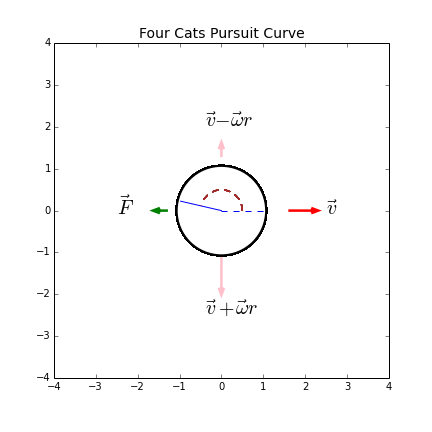
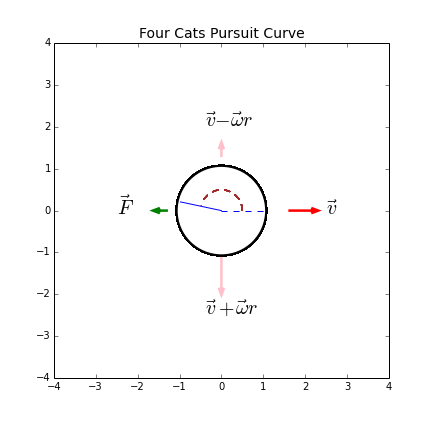
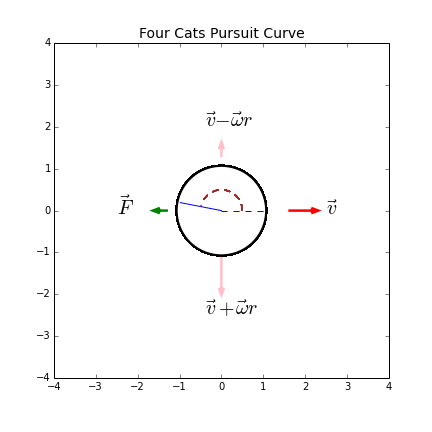
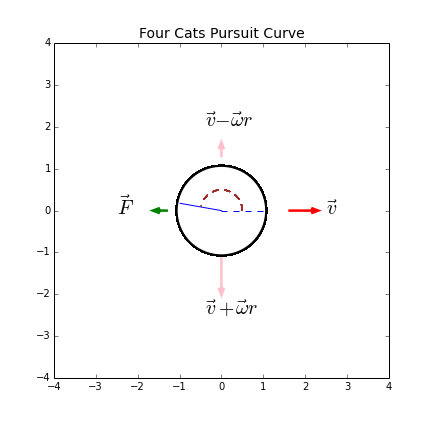
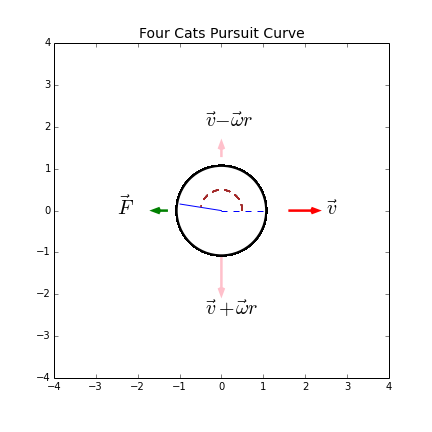
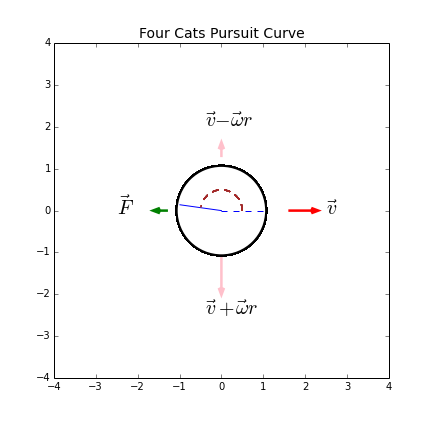
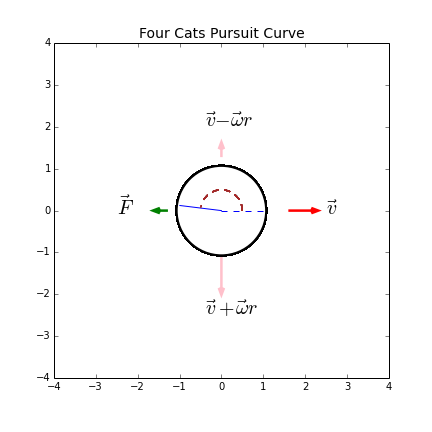
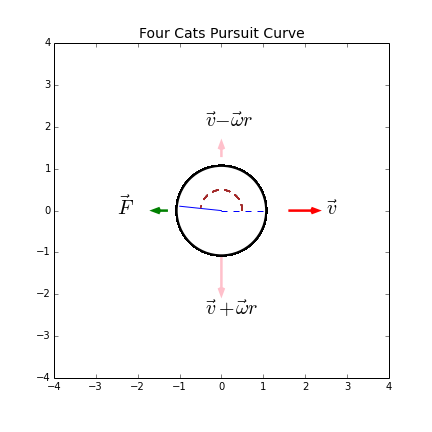
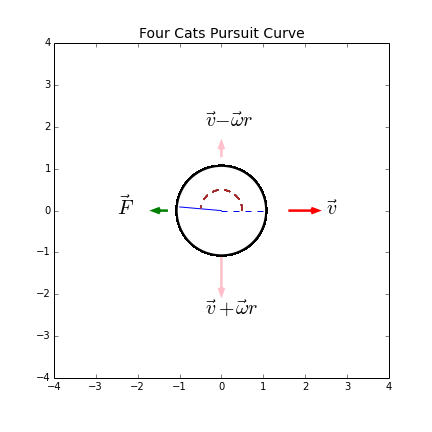
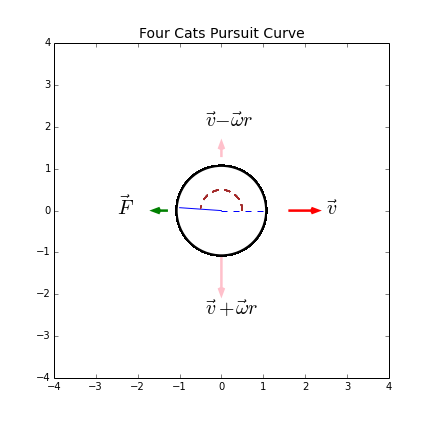
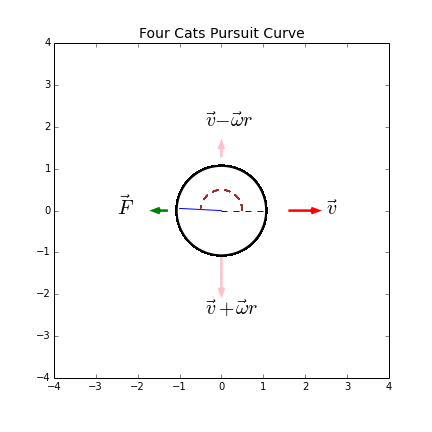
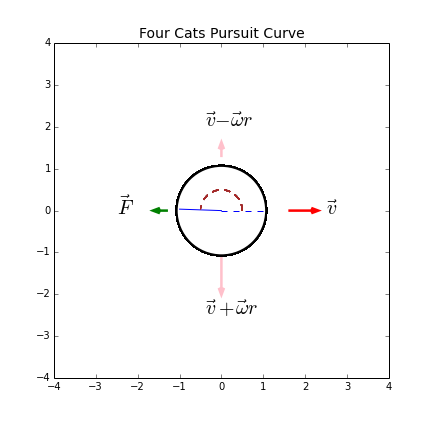
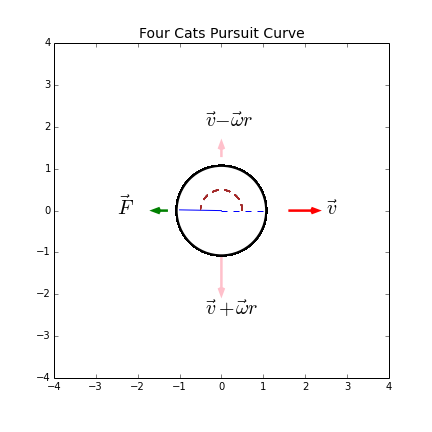

In [11]:

anim = plt.figure(figsize=(6,6))
ax = anim.add_subplot(111)
ax.set_title("Four Cats Pursuit Curve",fontsize=14)

plt.xlim([-4,4])
plt.ylim([-4,4])

text1=ax.text(2.5,-0.1,"$\\vec v$",size=20)
text2=ax.text(-0.4,2,"$\\vec v-\\vec\omega r$",size=20)
text3=ax.text(-0.4,-2.5,"$\\vec v+\\vec\omega r$",size=20)
text4=ax.text(-2.5,-0.1,"$\\vec F$",size=20)

baseball=np.array([0,0])
line,=ax.plot([],[])
line0,=ax.plot([0,1.],[0,0],'--',color="blue")
up=ax.quiver(0, 1.5, 0, 1.8, pivot='middle', headwidth=3, headlength=4,color="pink")
down=ax.quiver(0, -1.5,0, -1.8,scale=12, pivot='middle', headwidth=3, headlength=4,color="pink")
v=ax.quiver(2., 0, 1, 0., scale=10, pivot='middle', headwidth=3, headlength=4,color="red")
F=ax.quiver(-1.5, 0,-1, 0., pivot='middle', headwidth=3, headlength=4,color="green")
def init():
    return 
    #return ax.scatter(0,0,s=200, c='y',alpha=0.3 ), \
    #       ax.plot([0,cos(0)],[0,sin(0)]),
def animate(i):
    t=i*pi/180;
    s=np.linspace(0,t,10)
    line.set_data([0,cos(t)],[0,sin(t)]) 
    omega=ax.plot(0.5*cos(s),0.5*sin(s),'--',color="brown")
    
    #up.set_data([0,0],[1.7*(1-0.2*sin(t)),1.2]) 
    #down.set_data([0,0],[-1.2,-1.7*(1+0.2*sin(t))]) 
    return ax.scatter(0,0,s=8000,lw=2, c='w' ), \
           line,v,F,up,down,text1,text2,omega
 
animation.FuncAnimation(anim, animate, init_func=init, frames=180, interval=5)     

<h2>Physics of Baseball</h2>

Generally, a baseball in flight is subject to three distinct forces:

gravity is the for which causes the ball to accelerate vertically downwards at $g=9.8 m/s^2=32.15 ft/s^2$;
air drag, which impedes the ball's motion through the air;
Magnus force, which permits the ball to curve laterally.
Stoke's Law:

Physics of Baseball

Generally, a baseball in flight is subject to three distinct forces:

- Gravity is the force which causes the ball to accelerate vertically downwards at $g=9.8 m/s^2$;
- air drag is the force which impedes the ball's motion through the air;
- Magnus force is the force which permits the ball to curve laterally.

<h3>Stoke's Law</h3>

an object which moves  through a viscous fluid is directly proportional to the speed of that object with respect to the fluid.

And a sphere of radius $r$, moving with speed $v$ through a fluid whose coefficient of viscosity is $\eta$, experiences a drag force given by Stokes' law: $$ F_D=6\pi \eta r v$$

At velocities sufficiently low for Stokes' law to be valid, air is able to flow smoothly around a passing projectile. However, at higher velocities, the projectile's motion is too rapid for this to occur. Instead, the projectile effectively knocks the air out of its way. The total mass of air which the projectile comes into contact with per second is $\rho\,v\,A$, where $\rho$ is the air density, $v$ the projectile speed, and $A$ the projectile's cross-sectional area. Suppose, as seems reasonable, that the projectile imparts to this air mass a speed $v'$ which is directly proportional to $v$. The rate of momentum gain of the air, which is equal to the drag force acting on the projectile, is approximately

$$ F_D=\frac{1}{2}C_D(v)\rho A v^2$$

where the drag coefficient, $C_D(v)$, is a dimensionless quantity.

 

Giordano has developed the following useful formula which quantifies the drag force acting on a baseball:

$$ \frac{{F}_D}{m} = -F(v)\,v\,{\bf v}, $$

where

$$ F(v) = 0.0039 + \frac{0.0058}{1+{\rm exp}[(v-v_d)/{\mit\Delta}]}. $$

Here, $v_d = 35\,{\rm m/s}$ and ${\mit\Delta} = 5\,{\rm m/s}$.

 
<h3>Magnus Force</h3>

If we think of drag forces as exerting a sort of pressure on the ball then we can readily appreciate that when the unequal drag forces acting on the ball's upper and lower surfaces are added together there is a component of the resultant force acting upwards. This force -- which is known $\frac{d x}{d t}$ as the Magnus force, after the German physicist Heinrich Magnus, who first described it in 1853 -- is the dominant spin-dependent force acting on baseballs. The Magnus force can be written

$$ F_M = S(v) \omega \times v, $$

where $\omega$ is the angular velocity vector of the ball. According to Adair and Giordano, it is a fairly good approximation to take

$$ B= \frac{S}{m} =  4.1\times 10^{-4} $$

for baseballs. Note that $B$ is a dimensionless quantity. The magnitude of the Magnus force is about one third of the force due to gravity for typical curveballs.

The equations of motion of a baseball can be written as the following set of coupled first-order o.d.e.s:

 
\begin{align}
   \vec v &=&\left(\frac{d x}{d t},\frac{d y}{d t},\frac{d z}{d t}\right) &=& (v_x,v_y,v_z)\\
   \vec \omega &=&  \left(\omega_x,\omega_y,\omega_z \right)   \\
               &=&  \omega \left(0,\sin\phi,\cos\phi\right)   \\  
\end{align}


$$ \vec a = \frac{1}{m}\left(-m g(0,0,1)-F_D ||\vec v|| \vec v+S(v) \vec\omega \times \vec v \right)$$ 

 

\begin{aligned} \frac{d v_x}{d t}&=&- F(v) v v_x + B \omega (v_z\sin \phi - v_y \cos\phi), \\  \frac{d v_y}{d t}&=&- F(v) v v_y + B \omega v_x \cos\phi, \\ \frac{d v_z}{d t}&=&-g- F(v) v v_z - B \omega v_x \sin\phi \end{aligned}

with initial conditions:

$$(x_0,y_0,z_0,v_{x}(0),v_{y}(0),v_{z}(0))=(0,0,0,v_0\cos\theta,0,v_0\sin\theta)$$

 

where $v_0$ is the initial speed of the pitch, and $\theta$ is its initial angle of elevation.



<img src="imgs/magnus-2.png">

The angles  between Magnus Force and  vertical direction, $Z-$axis:

1. slider: $\phi=0^\circ$;

2. curveball: $\phi=45^\circ$;

3. fastball: $\phi=225^\circ$;

4. screwball: $\phi=135^\circ$;

In [1]:
#standard distance between pitcher and hitter  
pcd= 60.5  #  60 feet and 6 inches

print 60.5*0.3048, 60.5/(85*5280/60)*1800, 9.81/0.3048

18.4404 14.5588235294 32.1850393701


In [12]:
pcd= 60.5  # in feet or  60.5*0.3048m= 18.44 meters

g = 9.81 /0.3048
B=0.00041

x0=np.array([0.,0.,0.])
 
def F(v):
    #v=vector(v)
    return 0.0039+0.0058/(1+exp((norm(v)-35* 5028 /60./60.)/(5.* 5028 /60./60.)))

def V(v): 
    return(v)
        
def G(v): 
    w=np.array([0.,0.,0.])
    #v=vector(v)
    w[0] = -F(v)*norm(v)*v[0] + B*ww*(v[2]*cos(phi) - v[1]*sin(phi))
    w[1] = -F(v)*norm(v)*v[1] + B*ww*v[0]*cos(phi)
    w[2] = -F(v)*norm(v)*v[2] - B*ww*v[0]*sin(phi) -g
    return(w)

In [5]:
"""
Trajectory of a sliderdelivered by a right-handed pitcher

phi = 0
theta =  pi/180 # one degree 

At time t=0.52sec
speed = 76 mph
"""

ww=1800/60.
v_init = 100 * 5280 /60./60.
phi=0*pi/180
theta = 1*pi/180
v0=np.array([v_init*cos(theta),0,v_init*sin(theta)]) 

t0=0
tn=0.52
dt= 0.0001
n=int(tn/dt) 

t=[t0] 
x=[x0] 
v=[v0]

In [6]:
for i in np.arange(1,n+1): 
    x1=x[i-1]+dt*V(v[i-1]) 
    v1=v[i-1]+dt*G(v[i-1]) 

    x.append(x1) 
    v.append(v1) 
    t.append(t[i-1]+dt)

In [7]:
xdata0=[ xi[0] for xi in x] 
ydata0=[ xi[1] for xi in x] 
zdata0=[ xi[-1] for xi in x] 
#plt.plot(t,ydata)

In [8]:
"""
Trajectory of a screwballball delivered by a right-handed pitcher

phi = 135
theta =  pi/180 # one degree 

At time t=0.52sec
speed = 76 mph
"""

ww=1800/60.
v_init = 100 * 5280 /60./60.
phi=135*pi/180
theta = 1*pi/180
v0=np.array([v_init*cos(theta),0,v_init*sin(theta)]) 

t0=0
tn=0.52
dt= 0.0001
n=int(tn/dt) 

t=[t0] 
x=[x0] 
v=[v0]

In [9]:
for i in np.arange(1,n+1): 
    x1=x[i-1]+dt*V(v[i-1]) 
    v1=v[i-1]+dt*G(v[i-1]) 

    x.append(x1) 
    v.append(v1) 
    t.append(t[i-1]+dt)

In [10]:
xdata2=[ xi[0] for xi in x] 
ydata2=[ xi[1] for xi in x] 
zdata2=[ xi[-1] for xi in x] 
#plt.plot(t,ydata)

In [11]:
int(tn/dt)

5200

In [12]:
"""
Trajectory of a slider delivered by a left-handed pitcher

phi = 0
theta = 1* pi/180 # one degree 

At time t=0.52sec
speed = 76 mph
"""
x0=np.array([0.,0.,0.])
v_init = 100 * 5280 /60./60.
phi = 0*pi/180
theta = 1*pi/180
v0=np.array([v_init*cos(theta),0,v_init*sin(theta)]) 

ww = -1800/60.

t=[t0] 
x=[x0] 
v=[v0]

for i in np.arange(1,n+1): 
    x1=x[i-1]+dt*V(v[i-1]) 
    v1=v[i-1]+dt*G(v[i-1]) 

    x.append(x1) 
    v.append(v1) 
    t.append(t[i-1]+dt)
print x[-1]

[ 66.75870432  -0.20418858  -2.8315968 ]


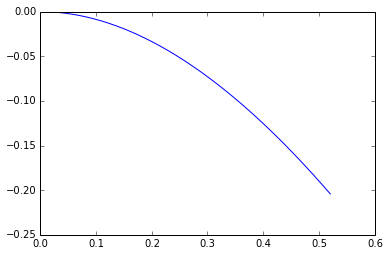

In [13]:
#T2=line(x,color="red")
xdata=[ xi[0] for xi in x] 
ydata=[ xi[1] for xi in x] 
zdata=[ xi[-1] for xi in x] 
plt.plot(t,ydata)

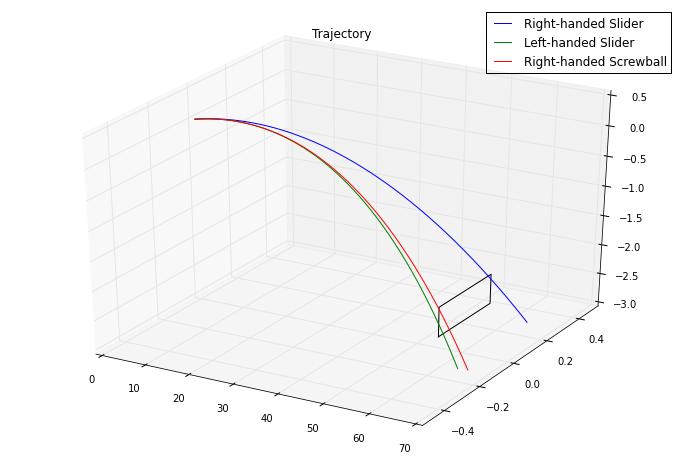

In [14]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
rect=[[60.4,-0.15,-2.5],[60.4,0.15,-2.5],[60.4,0.15,-2.0] ,[60.4,-0.15,-2.0],[60.4,-0.15,-2.5]]
basex=5*[60.4]
basey=[-0.15,0.15,0.15,-0.15,-0.15]
basez=[-2.5,-2.5,-2.0,-2.0,-2.5]
ax.set_ylim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_title("Trajectory")
ax.plot(basex,basey,basez,color="black")
ax.plot(xdata,ydata0,zdata0, label='Right-handed Slider')
ax.plot(xdata,ydata,zdata, label='Left-handed Slider')
ax.plot(xdata2,ydata2,zdata2, label='Right-handed Screwball')
ax.legend()

Unlike the other types of pitch we have encountered, knuckleballs are low speed pitches (typically, 65mph) in which the ball is purposely thrown with as little spin as possible. It turns out that knuckleballs are hard to hit because they have unstable trajectories which shift from side to side in a highly unpredictable manner. This is exactly what Watts and Sawyer observed. For the case of a 65mph knuckleball, Giordano has extracted the following useful expression for the lateral force, as a function of angular orientation, $\varphi$, from Watts and Sawyer's data:

$$ \frac{f_y}{m\,g} = G(\varphi) = 0.5\left[\sin(4\varphi) - 0.25\sin(8\varphi) + 0.08\,\sin(12\varphi)- 0.025\,\sin(16\varphi)\right].$$ 
The equations of motion of a baseball can be written as the fobr>llowing set of coupled first-order o.d.e.s: $$ $$ 
\begin{aligned} 
(\frac{d x}{d t},\frac{d y}{d t},\frac{d z}{d t}) &=& (v_x,v_y,v_z)\\
\frac{d v_x}{d t}&=&- F(v) v v_x , \\ 
\frac{d v_y}{d t}&=&- F(v) v v_y + g G(\varphi) , \\
\frac{d v_z}{d t}&=&-g- F(v) v v_z \\ \frac{d \varphi}{d t} &=& \omega\end{aligned}

In [6]:
def Gphi(p):
    return 0.5*( sin(4*p) - 0.25*sin(8*p) + 0.08*sin(12*p) - 0.025*sin(16*p) )

def knuckball(v,p): 
    w=np.array([0,0,0])
    #v=vector(v)
    w[0] = -F(v)*norm(v)*v[0] 
    w[1] = -F(v)*norm(v)*v[1] + g*Gphi(p)
    w[2] = -F(v)*norm(v)*v[2] - g
    dp = ww
    return(w,dp)

In [13]:
t0=0.69
tn=0.52
dt= 0.0001

ww=40/60.
theta= 4* pi/180.
phi0=-7*pi/180.
v_init = 65 * 5280 /60./60.
x0=np.array([0,0,0])
v0=np.array([v_init*cos(theta),0,v_init*sin(theta)]) 


t=[t0]
x=[x0]
v=[v0]
W=[phi0]
n=int(tn/dt*100/65.) 
for i in np.arange(1,n+1):
    VV,ww1=knuckball(v[i-1],W[i-1])
    x1=x[i-1]+dt*V(v[i-1]) 
    v1=v[i-1]+dt*VV
    ww1=W[i-1]+dt*ww1 

    x.append(x1) 
    v.append(v1)
    W.append(ww1) 
    t.append(t[i-1]+dt)
print x[-1]

[ 66.67822313   0.68631905  -4.65070011]


In [14]:
xdata=[ xi[0] for xi in x] 
ydata=[ xi[1] for xi in x] 
zdata=[ xi[-1] for xi in x] 

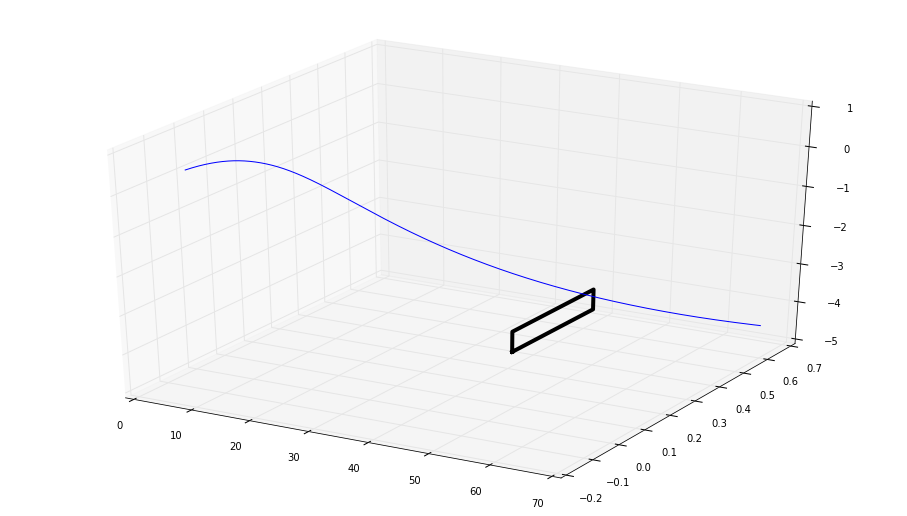

In [16]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
basex=5*[60.4]
basey=[-0.15,0.15,0.15,-0.15,-0.15]
basez=[-2.5,-2.5,-2.0,-2.0,-2.5]
ax.plot(basex,basey,basez,color="black", lw=4)

#ax.plot(xdata,ydata0,zdata0, label='Magnus Effect')
ax.plot(xdata,ydata,zdata, label='Magnus Effect')

In [67]:
t0=0.69
ww=40/60.
theta= 4* pi/180.
phi0=-7*pi/180.
v_init = 65 * 5280 /60./60.
x0=np.array([0,0,0])
vs=-0.2
v0=np.array([v_init*cos(theta),vs,v_init*sin(theta)]) 


t=[t0]
x=[x0]
v=[v0]
W=[phi0]
n=int(tn/dt*100/65.) 
for i in np.arange(1,n+1):
    VV,ww1=knuckball(v[i-1],W[i-1])
    x1=x[i-1]+dt*V(v[i-1]) 
    v1=v[i-1]+dt*VV
    ww1=W[i-1]+dt*ww1 

    x.append(x1) 
    v.append(v1)
    W.append(ww1) 
    t.append(t[i-1]+dt)


In [68]:
xdata1=[ xi[0] for xi in x] 
ydata1=[ xi[1] for xi in x] 
zdata1=[ xi[-1] for xi in x] 

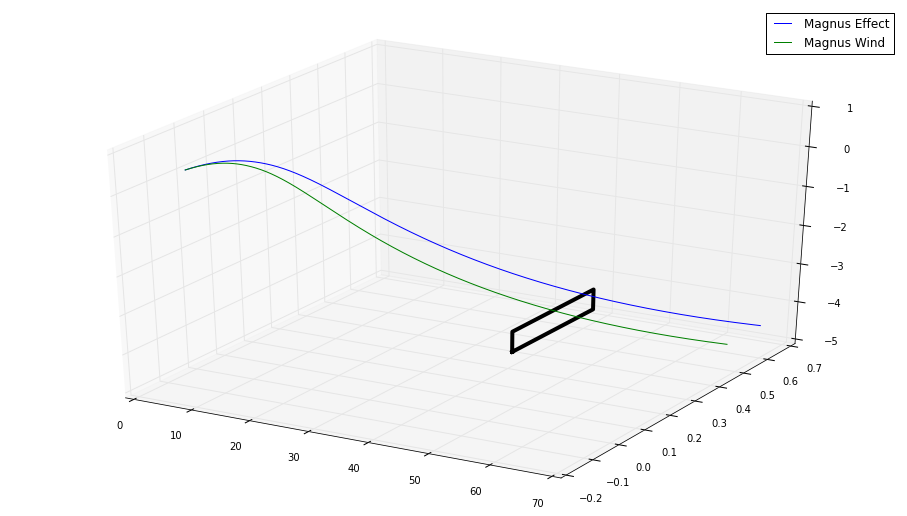

In [69]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')

ax.plot(basex,basey,basez,color="black", lw=4)
#ax.plot(xdata,ydata0,zdata0, label='Magnus Effect')
ax.plot(xdata,ydata,zdata, label='Magnus Effect')
ax.plot(xdata1,ydata1,zdata1, label='Magnus Wind')
ax.legend()


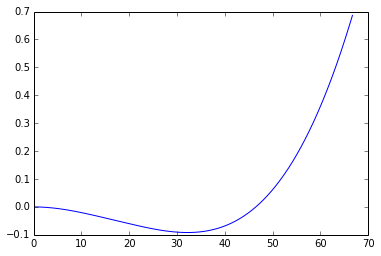

In [24]:
import matplotlib.pylab as plt
plt.plot(xdata,ydata, label='Magnus Effect')


$$
\begin{eqnarray}
   \frac { d r}{dt}&=&v_r&=&v_0\cos(\theta)\left(1-\frac{a^2}{r^2}\right)\\
   \frac{d \theta}{dt}&=&\frac{v_\theta}{r}&=&-v_0\sin(\theta)\left(\frac{1}{r}+\frac{a^2}{r^3}\right)+2\frac{\alpha a v_0}{r^2}
\end{eqnarray}
$$


In [ ]:
plt.figure(figsize=[16,3])
t=np.linspace(0,40,200)
n = 35; a=1.
CI_cart = [[4, .2 * i] for i in np.arange(n)]
CI = map(lambda x: [sqrt(x[0]**2+x[1]**2),pi - arctan(x[1]/x[0])], CI_cart)
i=1
for alpha in [0.1, 0.5, 1, 1.25]:
    dX_dt = lambda X, t=0:[cos(X[1])*(1-1/X[0]**2),-sin(X[1])*(1/X[0]+1/X[0]**3) + 2*alpha/X[0]**2] 
    
    plt.subplot(1,4,i)
    x=np.linspace(0,2*pi,100)
    q=plt.plot(cos(x),sin(x),color='green', linestyle='dashed',fillstyle='full')
    #q=circle((0, 0), 1, fill=True, rgbcolor='purple')
    for j in np.arange(n):
        X = integrate.odeint(dX_dt, CI[j], t)
        Y = [[u[0]*cos(u[1]), u[0]*sin(u[1])] for u in X]
        plt.xlim([-4,4])
        plt.ylim([-2,4])
        q += plt.plot(Y,  color='blue')
   
    i+=1    
    #plt.show(q)    

In [ ]:
CI